# (ADA) Homework 1: Scoring the Language Model Olympics

---

By the end of this homework, we expect you to be able to:

- Load data and handle data using pandas;
- Navigate the documentation of Python packages by yourself;
- Filter and tidy up noisy real-world datasets;
- Aggregate your data in different (and hopefully helpful) ways;
- Create meaningful visualizations to analyze the data;
- Communicate your findings in a clear and concise manner

---

**Important Dates.**

- Homework release: Fri 04 Oct 2024
- Homework due: Sat 18 Oct 2024, 23:59
- Grade release: Mon 04 Nov 2024

**Some rules**

- You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.
- Make sure you use the data folder provided in the repository in read-only mode. (Or alternatively, be sure you don’t change any of the files.)
- Be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice. To avoid confusion: use short comments for longer code answers.
- For questions containing the /Discuss:/ prefix, answer not with code, but with a textual explanation (in markdown).
- Back up any hypotheses and claims with data, since this is an important aspect of the course.
- Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master/main branch. If there are multiple notebooks present, we will not grade anything.
- We will not run your notebook for you! Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a fully-run and evaluated notebook. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
- In continuation to the previous point, interactive plots, such as those generated using the ‘plotly’ package, should be strictly avoided! Make sure to print results and/or dataframes that confirm you have properly addressed the task.

**A Note on using Language Models (LMs)**

If you try hard enough, you will likely get away with cheating. Fortunately, our job is not to police, but rather to educate! So, please consider the following:
- Presumably, you are taking this course to learn something! LMs are not always right ([they often fail in silly ways](https://community.openai.com/t/why-9-11-is-larger-than-9-9-incredible/869824/4)). This course should prepare you to detect when they are wrong!
- Some of the TAs on this course literally published many works on detecting machine-generated text.
---

## Context

Context
AI is booming! Newspapers, influencers, and your relatives all agree that AI is important. But while almost everyone agrees that AI is the future, much is unclear about what that future looks like…

Freshly graduated from the EPFL, you are hired by the Swiss government to advise on a large-scale “AI integration” initiative code-named **"NEUTRALITY"** (Navigating Efficient Upgrades Through Robust Artificial Learning Integration Techniques Yearly). Convinced by the stunning progress in language modeling, the government would like to battle the growing shortages in the education sector by using LMs. Your job description: investigate which LMs might be best suited!

You are given the results of three LMs on the [“Massive Multitask Language Understanding (MMLU)”](https://arxiv.org/abs/2009.03300) dataset to compare. This famous dataset consists of 57 subjects with multiple-choice questions, covering diverse subjects like mathematics, computer science, history, and law. Most providers of state-of-the-art LMs use this dataset to showcase the versatility of their latest models. Unfortunately, Horta-Ribeiro, the intern responsible for collecting the results, didn’t take EPFL’s famous ADA course. As a result, the collected datasets are slightly corrupted.

### A very brief primer on Language Models
Language models (LMs) are sophisticated statistical models designed to understand and generate human-like text. At their core, LMs are trained to predict the most likely continuation of a given input text. For example, given the input "The cat sat on the," an LM might predict "mat" as a likely continuation.
LMs are trained on vast text samples from various sources, including books, websites, and social media. This extensive training allows them to capture patterns and relationships in language, enabling them to generate coherent and contextually appropriate text across a wide range of topics and styles.

While LMs can produce text that appears to be written by intelligent humans, it's important to note that their capabilities can diverge from human intelligence in unexpected ways. They may sometimes generate factually incorrect information or struggle with complex reasoning tasks.

Two key concepts in understanding LMs are:
1. **Tokens**: LMs process text using "tokens" rather than individual characters. Tokens can be words, parts of words, or punctuation marks. For example, the sentence "I love AI!" might be tokenized as ["I", "love", "AI", "!"]. Tokenization is the first step in both training and using an LM.
2. **Context**: The input text provided to an LM is called the "context." This context informs the model's predictions or generations. A longer or more specific context often leads to more accurate and relevant outputs.

[See: Wikipedia entry on language models](https://en.wikipedia.org/wiki/Large_language_model)

###  Files for this assignment
This assignment is divided into three tasks, each of which should bring you a step closer to providing a recommendation toward project NEUTRALITY’s objectives:

- **Task 1**: Inspecting the results and getting your first model ranking
- **Task 2**: Inspecting the underlying data used to generate the results for possible biases
- **Task 3**: Learning about tokens and providing a final recommendation


```
📁 PROJECT_NEUTRALITY
│
├── 📄 analysis.ipynb (the file you're currently reading!)
├── 📄 requirements.txt (install into your environment)
│
├── 📁 task_1
├── 📁 task_2
└── 📁 task_2.5
```   
 

In [1]:
# please make sure you install the packages listed in the requirements.txt file in your environment!
# using pip
# pip install -r requirements.txt
#
# using Conda:
# conda create --name <env_name> --file requirements.txt
#
# some basic imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.stats import ttest_ind

# for using it as random_state when we subsample to rebalance our categories
SEED = 42



## Task 1 (18 points): What's in an average anyway?

The files needed to complete task 1 can be found in the folder "`data/task_1/`:
```
task_1/
│
├── mmlu_data/
│   └── test.csv
│
└── lm_scores/
    ├── lm_X.csv
    ├── lm_Y.csv
    └── lm_Z.csv
```

We will start by loading, (manually) inspecting, and cleaning the data. Although it doesn't seem "glamorous" (nor is it particularly fun...) - manually inspecting data is extremely important! In fact, it's one of the few things most AI and Data Science researchers agree on :). Next, we will take a first pass on ordering our Olympic podium between three LMs.

### 1.1 (1 pt)
 
Load the subfiles contained in the `mmlu_data` and `lm_scores` folders into separate dataframes:
- `df_test`
- `df_x`
- `df_y`
- `df_z`

for each, print their sizes.

In [2]:
# Load the datasets into separate dataframes
df_test = pd.read_csv('data/task_1/mmlu_data/test.csv')
df_x = pd.read_csv('data/task_1/lm_scores/lm_X.csv')
df_y = pd.read_csv('data/task_1/lm_scores/lm_Y.csv')
df_z = pd.read_csv('data/task_1/lm_scores/lm_Z.csv')

# Print the size of each dataframe 
print(f"Size of df_test: {df_test.size}")
print(f"Size of df_x: {df_x.size}")
print(f"Size of df_y: {df_y.size}")
print(f"Size of df_z: {df_z.size}")

Size of df_test: 112336
Size of df_x: 27764
Size of df_y: 27956
Size of df_z: 27846


### 1.2 (4 pt)
Unfortunately, LMs don't always output the format we want. In the column `result`, the value should be one of A, B, C, or D. 

A. For each of the LM score dataframes, use a `value_counts()` operation and print the results. 

B. /Discuss:/ Inspect the results and describe the types of answer formats you see. Besides the "expected" case, you should be able to find at least four unexpected formats.

## A

In [3]:
# We will use the value_counts operation on the 'result' column to count the number of 
# different answer for each lm

# We use .apply(repr) to display the hidden characters

print(df_x['result'].apply(repr).value_counts()[:20])

result
'A'                                                                                                     2733
'A '                                                                                                    1657
'B'                                                                                                     1412
'Answer: A'                                                                                             1398
'C'                                                                                                     1134
'D'                                                                                                     1124
'B '                                                                                                     793
'Answer: B'                                                                                              760
'C '                                                                                                     622
'Answer: D' 

In [4]:
print(df_y['result'].apply(repr).value_counts()[:15])

result
'D'                    2894
'Answer: D'            1718
'C'                    1701
'B'                    1240
'D '                   1145
'A'                    1008
'Answer: C'             907
'Answer: B'             726
'C '                    634
'Answer: A'             597
'B '                    553
'A '                    428
nan                     145
'Not Sure'               86
'None of the above'      66
Name: count, dtype: int64


In [5]:
print(df_z['result'].apply(repr).value_counts()[:15])

result
'D'                    2257
'C'                    2191
'B'                    2127
'A'                    2060
'Answer: D'             777
'Answer: C'             748
'Answer: B'             712
'Answer: A'             687
nan                     345
'C '                    316
'D '                    314
'B '                    285
'A '                    279
'Not Sure'              125
'None of the above'     119
Name: count, dtype: int64


## B

The expected case would be the LMs answering A, B, C or D.

The first observation is that the same letters A, B, C or D appear multiple times in the value_count. To investigate this, we used the repr() function to show the hidden characters and we conclude now that this is due to trailing spaces added after the answers by the LMs.

We report 6 unexpected format among the most frequent answers : 

**1 . Answer : A, B, C or D :**  The LMs use the prefix 'Answer :' in front of the letters.

**2. Not Sure :** The LMs don't return an answer at all and instead return 'Not sure'.

**3. nan :** The DataSet contains missing or undefined values.

**4. None of the above :** The LMs sometimes think that there is no correct answer in the proposed choices.

**5. Sentence to explaint the answer :** The LMs give a full sentence to show the reasoning that led to the answer.

**6. Stating the answer :** The LMs state the answer before giving the answer letter. 

   

### 1.3 (5 pt)
Oh oh... That doesn't look great. Simply dropping all invalid answers seems overly wasteful, yet fixing all of these looks like a mess! Instead, let's focus for now on fixing just those answers of length < 10 characters that require only a single `str.replace()` operation. 

For example, if the answer looks like `--A--`, we could fix this by using the following simple function:

```
def clean_answer(s, pattern='-'):
    return str(s).replace(pattern, '')

dirty_answer = '--A--'
clean_answer = clean_answer(dirty_answer)
```

A. Filter the three score dataframes to include only answers with less than 10 characters. Make a deep copy of the dataframes as you filter them.

B. Modify the `clean_answer()` example function to clean the answers in the filtered data frames using the `apply()` functionality. Finally, make sure **all remaining answers are one of `A, B, C, or D`.**

C. /Discuss:/ Compare the sizes of the original and filtered data frames. What do you see? Why might this be a problem?

### A

In [6]:
# we filter each df to include only answers with less than 10 chars and make a deep copy of each df
df_x_preprocessed = df_x[df_x["result"].str.len() < 10].copy()
df_y_preprocessed = df_y[df_y["result"].str.len() < 10].copy()
df_z_preprocessed = df_z[df_z["result"].str.len() < 10].copy()

### B

In [7]:
# We redefine the function and change the pattern argument to a list
def clean_answer(s, pattern=[]):
    for p in pattern:
        s = str(s).replace(p, '')
    return s

# We create variables to perform the cleaning operation afterwards
dfs = [('x', df_x_preprocessed), ('y', df_y_preprocessed), ('z', df_z_preprocessed)]
patterns = [' ', 'Answer:']
accepted_answers = ["A", "B", "C", "D"]

# We use a loop to clean each df and check that it is well preprocessed
for name, df in dfs:
    df["result"] = df["result"].apply(lambda x: clean_answer(x, patterns))
    
    df.drop(df[~df["result"].isin(accepted_answers)].index, axis=0, inplace=True)

    # We reset the indexes after the drop operation
    df.reset_index(drop=True, inplace=True)
    
    # We check that all results are accepted
    all_accepted = df["result"].isin(accepted_answers).all()
    print(f"All results in LLM {name} are accepted: {all_accepted}")


All results in LLM x are accepted: True
All results in LLM y are accepted: True
All results in LLM z are accepted: True


### C : Discussion

In [13]:
for model_name, df, df_preprocessed in [('x', df_x, df_x_preprocessed), ('y', df_y, df_y_preprocessed), ('z', df_z, df_z_preprocessed)]:
    before = df.shape[0]
    after = df_preprocessed.shape[0]
    loss_percentage = ((before - after) / before) * 100
    print(f"LLM {model_name}\n\tNumber rows before filtering: {before}\n\tNumber rows after filtering: {after}\n\tLoss Percentage: {loss_percentage:.2f}%\n")

LLM x
	Number rows before filtering: 13882
	Number rows after filtering: 13436
	Loss Percentage: 3.21%

LLM y
	Number rows before filtering: 13978
	Number rows after filtering: 13551
	Loss Percentage: 3.05%

LLM z
	Number rows before filtering: 13923
	Number rows after filtering: 12753
	Loss Percentage: 8.40%



We see that the sizes of the pre-processed DFs are different from the original sizes because a few rows have been deleted. We also see that model Z lost the highest percentage of rows. This might be a problem because some of the unique or unexpected answers that the LMs generated are no longer part of the dataset. We think these row deletions could introduce bias into the data because of the loss of valuable and diverse data. 
<!-- We noticed a common pattern in some of the longer-than-10-character answers that were discarded, and it is that many of them end in "so the answer is [X]". We could've kept more data points if we also exploited this pattern match. These type of answers can be beneficial for analyzing the LMs and improving them. -->



### 1.4 (3 pt)

Now that our answer columns are nicely formatted, let's take a look at model performance:

A. Both the `MMLU` dataframes and the language model score data frames have the columns `question_id`. For each of the language model score data frames, use an inner join operation with the `df_test` dataframe on the `question_id` column.

B. Add a new column to each of the resulting dataframes called `correct`, that checks if the model's answer in `result` is the same as the expected answer in the column `answer`. Then, print the average score of each model.

## A 

In [14]:
# merging the DFs with an inner join operation. Note that pd.merge does an inner join by default
df_x_merged = pd.merge(df_test, df_x_preprocessed, left_on="question_id", right_on="question_id")
df_y_merged = pd.merge(df_test, df_y_preprocessed, left_on="question_id", right_on="question_id")
df_z_merged = pd.merge(df_test, df_z_preprocessed, left_on="question_id", right_on="question_id")


## B 

In [15]:
# Creating a new column 'correct' of boolean values 
df_x_merged['correct'] = df_x_merged['result'] == df_x_merged['answer']
df_y_merged['correct'] = df_y_merged['result'] == df_y_merged['answer']
df_z_merged['correct'] = df_z_merged['result'] == df_z_merged['answer']

In [17]:
# Compute the avg score for each model by dividing the number of TRUE in the 'correct' column 
# by the number of rows

avg_score_x = df_x_merged['correct'].sum() / df_x_merged.shape[0] * 100
print(f"The average score for the LM X is: {avg_score_x:.2f}%")

avg_score_y = df_y_merged['correct'].sum() / df_y_merged.shape[0] * 100
print(f"The average score for the LM Y is: {avg_score_y:.2f}%")

avg_score_z = df_z_merged['correct'].sum() / df_z_merged.shape[0] * 100
print(f"The average score for the LM Z is: {avg_score_z:.2f}%")

The average score for the LM X is: 76.75%
The average score for the LM Y is: 74.58%
The average score for the LM Z is: 66.33%


### 1.5 (5 pt)

Hmmm, something doesn't seem quite right. Let's investigate how "balanced" this dataset is:

A. For each of the 57 subjects in the MMLU, compare the number of questions answered by each model. Print the subjects for which there is a more than 10% difference.

B. Propose and implement a reasonable way to rebalance the results. (e.g., while throwing away 100% of the results perfectly rebalances the results, it is not reasonable).

C. Finally, print the updated accuracy on the rebalanced data.

**hint:**:
- (A) For a given subject, let model X and model Y have answered 181 and 200 questions respectively. You can consider this a 10% difference from the perspective of X since: (200 - 181) / 181 > 0.10

## A

In [18]:
# We create DFs that has the number of questions for each category
counts_cat_x = df_x_merged.groupby("subject")["subject"].count()
counts_cat_y = df_y_merged.groupby("subject")["subject"].count()
counts_cat_z = df_z_merged.groupby("subject")["subject"].count()

# We combine them into a single dataframe for a more easy comparison
counts_combined = pd.DataFrame({'X': counts_cat_x,'Y': counts_cat_y,'Z': counts_cat_z}).fillna(0)

#Calculate the differences between models and store it in the DataFrame
counts_combined["diff_XY"] = abs((counts_combined["Y"] - counts_combined["X"])/ np.minimum(counts_combined["Y"], counts_combined["X"]))
counts_combined["diff_YZ"] = abs((counts_combined["Z"] - counts_combined["Y"])/ np.minimum(counts_combined["Z"], counts_combined["Y"]))
counts_combined["diff_ZX"] = abs((counts_combined["X"] - counts_combined["Z"])/ np.minimum(counts_combined["X"], counts_combined["Z"]))

#Boolean filtering of categories that have more than 10% difference 
big_diff_cat = counts_combined[(counts_combined["diff_XY"] > 0.10) | (counts_combined["diff_YZ"]> 0.10) | (counts_combined["diff_ZX"] > 0.10 )]

print("Unbalanced Subjects:")
# To Print the subjects where there is a more than 10% difference, print the 'subject' (the index) values for each row in 'big_diff_cat'
for index, row in big_diff_cat.iterrows():
    print(index)



Unbalanced Subjects:
college chemistry
college computer science
computer security
formal logic
high school geography
logical fallacies
medical genetics
moral disputes
moral scenarios


## B

We can use ***downsampling*** : 

We randomly remove questions from the subjects with more than 10% difference so that the 3 LMs have the same number of questions in these subjects.

To do so, we identify for each subject with more than 10%, the minimum number of questions in the 3 LMs, and in the remaining 2 we drop questions to match the minimum.

In [19]:
# Subsample the incriminated subjects in order to have the same number of questions in each model.
# The number choosen is the one of the smallest counts

# Helper function to rebalance a category in a dataFrame
def rebalance_df(df, col_name, cat, number_samples, seed):
    # get all questions of the passed in category
    filtered_df = df[df[col_name] == cat] 
    # downsample number_samples questions 
    sampled_df = filtered_df.sample(n=number_samples, random_state=seed)  # Set random_state for reproducibility
    # get the rest of the questions not in the category we are filtering 
    non_x_df = df[df[col_name] != cat]
    # combine our sampled category with the rest
    final_df = pd.concat([sampled_df, non_x_df], ignore_index=True)
    return final_df


for index, row in big_diff_cat.iterrows():
    min_count = int(row[["X", "Y", "Z"]].min())
    df_x_merged = rebalance_df(df=df_x_merged, col_name="subject", cat=index, number_samples=min_count, seed=SEED)
    df_y_merged = rebalance_df(df=df_y_merged, col_name="subject", cat=index, number_samples=min_count, seed=SEED)
    df_z_merged = rebalance_df(df=df_z_merged, col_name="subject", cat=index, number_samples=min_count, seed=SEED)


## C

In [20]:
# We print the avg accuracy for each lM after downsampling

avg_score_x = df_x_merged['correct'].sum() / df_x_merged.shape[0] * 100
print(f"The average score for the LM X is: {avg_score_x:.2f}%")

avg_score_y = df_y_merged['correct'].sum() / df_y_merged.shape[0] * 100
print(f"The average score for the LM Y is: {avg_score_y:.2f}%")

avg_score_z = df_z_merged['correct'].sum() / df_z_merged.shape[0] * 100
print(f"The average score for the LM Z is: {avg_score_z:.2f}%")

The average score for the LM X is: 76.77%
The average score for the LM Y is: 74.67%
The average score for the LM Z is: 66.32%


## Task 2 (26 points): What do you mean A > D > B > C...?

Nice work! Having successfully inspected, cleaned, and rebalanced the provided data, you head over to director of the government's NEUTRALITY project. Ms. Sakota is happy with your work so far, but worried that the sloppy intern might have done more undetected damage. To be sure, she orders a new set of evaluations of all models on both MMLU and another dataset.

After cleaning up and rebalancing, you are left with the concatenated score files in the second folder `task_2`:
```
task_2/
│
└── lm_scores_mmlu.csv
│
└── lm_scores_other.csv
```

Each has a new column called `model_name`, which is one of `X, Y` or `Z`.



_NOTE: **only** use data from `task_2` and `task_2_5` for this assignment! The values in `lm_scores_mmlu.csv` will NOT be the same as the dataframes you finished in task 1. This is due to "randomness" or "temperature" in language model inference. This can slightly shift around generative results. (Conveniently: it also ensures any mistakes made in Task 1 don't propogate further ;) )_

In [21]:
# PROVIDED CODE
df_mmlu = pd.read_csv('data/task_2/lm_scores_mmlu.csv')
df_other = pd.read_csv('data/task_2/lm_scores_other.csv')

### 2.1 (4 pt)

Let's explore the new results:

A. Compute the mean accuracy and standard errors of each model on both datasets and print the results.

B. Then, show your results in a bar plot using standard errors with a 95% confidence interval around the mean. Make sure the plot is easy to read and well annotated.

C. /Discuss:/ the plot you created: (i) can you say that one of the models is the best? (ii) is there anything that seems odd?

In [22]:
# A
df_accuracy = pd.DataFrame()

for model in df_mmlu["model_name"].unique():
    # MMLU Dataset
    df_filtered = df_mmlu[df_mmlu["model_name"] == model]
    df_temp = pd.DataFrame({
        "accuracy": [df_filtered["correct"].sum()/df_filtered.shape[0]],
        "sem": [df_filtered["correct"].sem()],
        "model": [model],
        "dataset": ["mmlu"]
    })
    df_accuracy = pd.concat([df_accuracy, df_temp], ignore_index=True)

    # Other Dataset
    df_filtered = df_other[df_other["model_name"] == model]
    df_temp = pd.DataFrame({
        "accuracy": [df_filtered["correct"].sum()/df_filtered.shape[0]],
        "sem": [df_filtered["correct"].sem()],
        "model": [model],
        "dataset": ["other"]
    })
    df_accuracy = pd.concat([df_accuracy, df_temp], ignore_index=True)

# Calculate 95% confidence intervals (the height of the error bar in the next plot)
df_accuracy["yerr"] = 1.96 * df_accuracy["sem"]


display(df_accuracy)

,accuracy,sem,model,dataset,yerr
0,0.743588,0.004038,X,mmlu,0.007914
1,0.787976,0.006668,X,other,0.013069
2,0.761542,0.003941,Y,mmlu,0.007723
3,0.720936,0.007317,Y,other,0.014341
4,0.655951,0.004393,Z,mmlu,0.008610
5,0.671721,0.007660,Z,other,0.015014


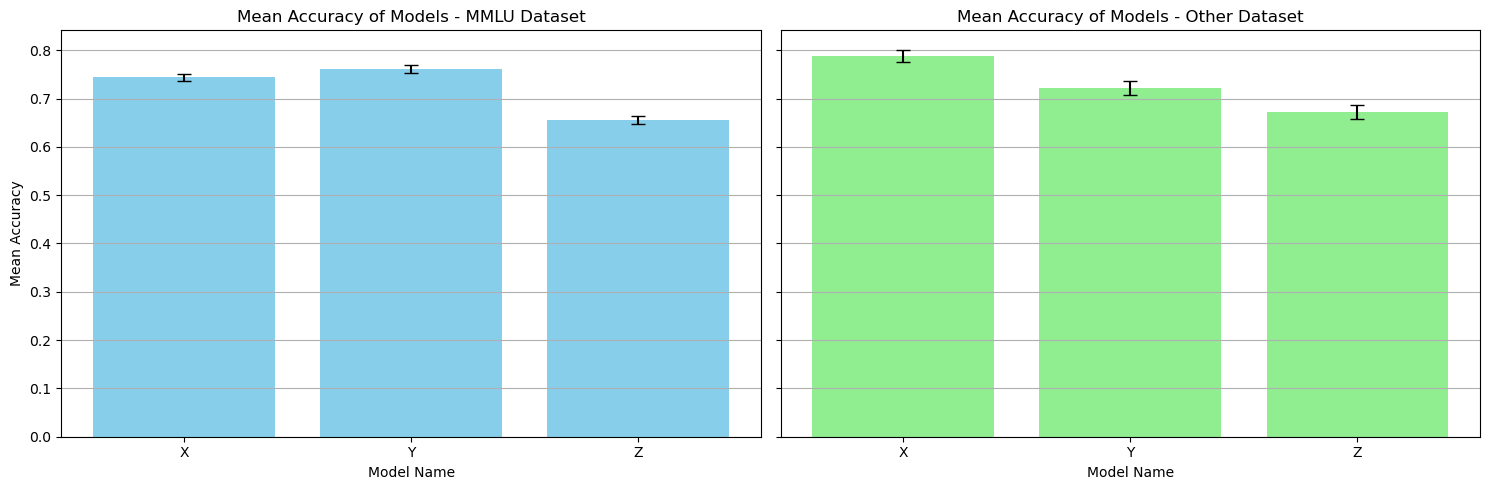

In [23]:
# B
fig, axs = plt.subplots(1,2,figsize=(15,5), sharey=True)

#mmlu dataset
mmlu_data = df_accuracy[df_accuracy["dataset"] == "mmlu"]
axs[0].bar(mmlu_data["model"], mmlu_data["accuracy"], yerr=mmlu_data["yerr"], capsize=5, color='skyblue')
axs[0].set_title('Mean Accuracy of Models - MMLU Dataset')
axs[0].set_ylabel('Mean Accuracy')
axs[0].set_xlabel('Model Name')
axs[0].set_xticks(mmlu_data["model"])
axs[0].set_xticklabels(mmlu_data["model"])
axs[0].grid(axis='y')

# Bar plot for df_other
other_data = df_accuracy[df_accuracy["dataset"] == "other"]
axs[1].bar(other_data["model"], other_data["accuracy"], yerr=other_data["yerr"], capsize=5, color='lightgreen')
axs[1].set_title('Mean Accuracy of Models - Other Dataset')
axs[1].set_xlabel('Model Name')
axs[1].set_xticks(other_data["model"])
axs[1].set_xticklabels(other_data["model"])
axs[1].grid(axis='y')

plt.tight_layout()
plt.show()

C. /Discuss:/

It can be stated that model Z is the worst across the two datasets. In contrast, it is not possible to determine a single best model; indeed, models X and Y fluctuate in their relative accuracy across the two datasets.

<!--- Simply looking at the charts, model X seems to be performing better than the other 2 when generalizang to other datasets, and model Z doing the worst by quite a margin. However this is not enough to conclude anything about the quality of the models or whcih one is really the best.
One observation we can make is that the models seem to be performing quite differently from one dataset to the next, with a difference in accuracy of about 5% between the two datasets for models X and Y. Something else we can notice is that the standard errors are ??significantly?? bigger in the "Other Dataset" compared to the "MMLU Dataset".
CI semmes to be very samll

strange is thta th emodles seems ot better differelty in the 2 satsasets. --->


### 2.2 (5 pt)

Ms. Sakota has assured you that both datasets contain questions of similar difficulty, so, what could be going on here?

A. What is the distribution of correct answers (A, B, C, D) for each dataset? Create a bar chart to visualize this.

B. Perform a chi-square test at $\alpha = 0.05$, of independence to determine if there's a significant difference in the distribution of correct answers between the two datasets. What do you conclude?

**hints**:
- for (A), keep in mind that df_mmlu and df_other contain the results of all models, i.e., the `question_id` column is duplicated.
- for (A), take care to clearly annotate the bar chart, e.g., title, y-label, legend.
- for (B), clearly state the null hypothesis and alternative hypothesis
- use the `chi2_contingency` function from `scipy.stats`
- format your results from answer (A) as a 2D array

,answer,count
3,A,1611
2,B,2943
1,C,3403
0,D,3739


,answer,count
1,A,1078
0,B,1116
2,C,924
3,D,641


,MMLU,OTHER
A,1611,1078
B,2943,1116
C,3403,924
D,3739,641


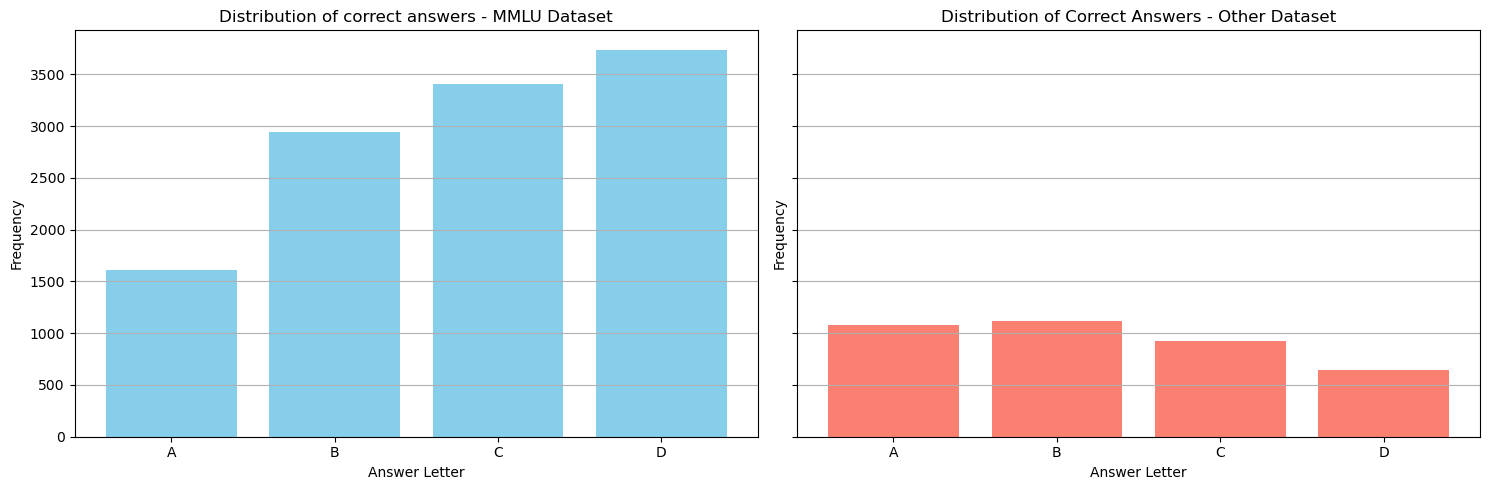

In [48]:
# A
fig, axs = plt.subplots(1,2,figsize=(15,5), sharey = True)

# Attention: as stated in https://edstem.org/eu/courses/1490/discussion/133572 we report the count of correct answers

# Count answers by letter
df_mmlu_x = df_mmlu[df_mmlu["model_name"] == "X"] #take only the answer of one model bacuase the questions are duplicated
df_counts_mmlu = df_mmlu_x['answer'].value_counts().reset_index()
df_counts_mmlu = df_counts_mmlu.sort_values(by="answer")
display(df_counts_mmlu)

# do the same for the orther df
df_other_x = df_other[df_other["model_name"] == "X"] #take only the answer of one model bacuase the questions are duplicated
df_counts_other = df_other_x['answer'].value_counts().reset_index()
df_counts_other = df_counts_other.sort_values(by="answer")
display(df_counts_other)

# Format results in a 2D array for easier chi-squared test later
contingency_table = pd.DataFrame({
    'MMLU': df_counts_mmlu['count'].values,
    'OTHER': df_counts_other['count'].values
}, index=['A', 'B', 'C', 'D'])
display(contingency_table)


#mmlu dataset
mmlu_data = df_accuracy[df_accuracy["dataset"] == "mmlu"]
axs[0].bar(df_counts_mmlu["answer"],df_counts_mmlu["count"], capsize=5, color='skyblue')
axs[0].set_title('Distribution of correct answers - MMLU Dataset')
axs[0].set_ylabel('Frequency')
axs[0].set_xlabel('Answer Letter')
axs[0].set_xticks(df_counts_mmlu["answer"])
axs[0].set_xticklabels(df_counts_mmlu["answer"])
axs[0].grid(axis='y')

# Bar plot for df_other
axs[1].bar(df_counts_other["answer"], df_counts_other["count"], capsize=5, color='salmon')
axs[1].set_title('Distribution of Correct Answers - Other Dataset')
axs[1].set_ylabel('Frequency')
axs[1].set_xlabel('Answer Letter')
axs[1].set_xticks(df_counts_other["answer"])
axs[1].set_xticklabels(df_counts_other["answer"])
axs[1].grid(axis='y')

plt.tight_layout()
plt.show()

In [56]:
# B

display(contingency_table)

# Perform Chi-squared test
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Null Hypothesis (H0): There is no association between the dataset (MMLU vs. OTHER) and the distribution of correct answers (A, B, C, D). The distributions are independent.")
print("Alternative Hypothesis (H1): There is an association between the dataset and the distribution of correct answers. The distributions are not independent.")
print(f"\np-value: {p}")
print(f"Expected frequencies under H0:\n{expected}")

# Decision
alpha = 0.05  # significance level
if p < alpha:
    conclusion = "\nReject the null hypothesis: There is a significant difference in the distribution of correct answers between the two datasets."
else:
    conclusion = "\nFail to reject the null hypothesis."

print(conclusion)

print("\nWe conclude that there is a significant difference in the distribution of correct answers between the MMLU dataset and the OTHER dataset.")

,MMLU,OTHER
A,1611,1078
B,2943,1116
C,3403,924
D,3739,641


Null Hypothesis (H0): There is no association between the dataset (MMLU vs. OTHER) and the distribution of correct answers (A, B, C, D). The distributions are independent.
Alternative Hypothesis (H1): There is an association between the dataset and the distribution of correct answers. The distributions are not independent.

p-value: 4.270849602795191e-136
Expected frequencies under H0:
[[2034.97534778  654.02465222]
 [3071.76085409  987.23914591]
 [3274.5772889  1052.4227111 ]
 [3314.68650922 1065.31349078]]

Reject the null hypothesis: There is a significant difference in the distribution of correct answers between the two datasets.

We conclude that there is a significant difference in the distribution of correct answers between the MMLU dataset and the OTHER dataset.


### 2.3 (7 pt)

Let's dive in deeper:

A. What is language model X's mean accuracy conditioned on the four answer options for each dataset?

B. Compare LM X's performance when the correct answer is "A" between the two datasets. Use a T-test with CI = 0.95. What do you conclude?

C. Compare LM X's performance when the correct answer is "A" vs. "C or D" for each dataset. Use a T-test with CI = 0.95. What do you conclude?

In [58]:
# A
print("For dataset MMLU:")
df_X_mmlu = df_mmlu[df_mmlu["model_name"] == "X"].groupby("answer").agg(
    tot_correct=("correct", "sum"),
    tot=("correct", "size")
)
df_X_mmlu["accuracy"] = df_X_mmlu["tot_correct"] / df_X_mmlu["tot"]
display(df_X_mmlu)

print("For dataset Other")
df_X_other = df_other[df_other["model_name"] == "X"].groupby("answer").agg(
    tot_correct=("correct", "sum"),
    tot=("correct", "size")
)
df_X_other["accuracy"] = df_X_other["tot_correct"] / df_X_other["tot"]
display(df_X_other)


For dataset MMLU:


,tot_correct,tot,accuracy
answer,,,
A,1567,1611,0.972688
B,2352,2943,0.799185
C,2409,3403,0.707905
D,2369,3739,0.633592


For dataset Other


,tot_correct,tot,accuracy
answer,,,
A,1050,1078,0.974026
B,900,1116,0.806452
C,625,924,0.676407
D,387,641,0.603744


In [ ]:
# B

# create arrays of right and wrong answers
#mmlu
mmlu_A = df_mmlu[(df_mmlu["model_name"] == "X") & (df_mmlu["answer"] == "A")]["correct"].to_list()
mmlu_A = [int(x) for x in mmlu_A]

# #other
other_A = df_other[(df_other["model_name"] == "X") & (df_other["answer"] == "A")]["correct"].to_list()
other_A = [int(x) for x in other_A]

# perform t test
t_A = ttest_ind(a = mmlu_A, b = other_A, equal_var=True) # uses 95% CI by deafualt

# conclude

print("Null Hypothesis: Mean of LM X's answers when the correct answer is A is the same between the two datasets.")
print("Alternative Hypothesis: Mean of LM X's answers when the correct answer is A is different between the two datasets.")

print("p value:", round(t_A.pvalue, 3))

print("The p value is greater than 0.05, therefore we do not reject the null hypothesis.") 
print("We cannot say that there is a difference in LM X's performance between the two datasets when answering questions to which the correct answer is A.")

In [ ]:
# C

# create arrays of right and wrong answers
# mmlu
mmlu_CD_correct = df_X_mmlu.loc[['C', 'D'], 'tot_correct'].sum()
mmlu_CD_tot = df_X_mmlu.loc[['C', 'D'], 'tot'].sum()
mmlu_CD_incorrect = mmlu_CD_tot - mmlu_CD_correct

mmlu_CD = [0] * mmlu_CD_incorrect + [1] * mmlu_CD_correct

# other
other_CD_correct = df_X_other.loc[['C', 'D'], 'tot_correct'].sum()
other_CD_tot = df_X_other.loc[['C', 'D'], 'tot'].sum()
other_CD_incorrect = other_CD_tot - other_CD_correct

other_CD = [0] * other_CD_incorrect + [1] * other_CD_correct

# perform t tests

t_mmlu_ACD = ttest_ind(a = mmlu_A, b = mmlu_CD, equal_var=True)

t_mmlu_other = ttest_ind(a = other_A, b = other_CD, equal_var=True)

# conclude

print("MMLU:")
print("Null Hypothesis: Mean of LM X's answers when the correct answer is A is the same as when it is C or D.")
print("Alternative Hypothesis: Mean of LM X's answers when the correct answer is A is different from when it is C or D.")

print("p value:", t_mmlu_ACD.pvalue)

print("The p value is smaller than 0.05, therefore we reject the null hypothesis.") 
print("We can conclude that there is a difference in the model's performance when answering questions where A is correct and where C or D is correct.")
print("\n")

print("Other:")

print("p value:", t_mmlu_other.pvalue)
print("We can conclude the same thing for the Other dataset, the p value being under 0.05.")

### 2.4 (2 pt)

What an intriguing finding! 

A. Print the mean accuracies conditioned on the correct answer for all LMs for each dataset.

B. /Discuss:/ What do you observe?

In [70]:
# A

models = df_mmlu["model_name"].unique()  # Get unique model names from the MMLU dataset

# Create an empty DataFrame to store results
accuracy_summary = pd.DataFrame()

for model in models:
    # MMLU Dataset
    df_model_mmlu = df_mmlu[df_mmlu["model_name"] == model].groupby("answer").agg(
        tot_correct=("correct", "sum"),
        tot=("correct", "size")
    )
    df_model_mmlu["accuracy"] = df_model_mmlu["tot_correct"] / df_model_mmlu["tot"]
    df_model_mmlu["model_name"] = model
    df_model_mmlu["dataset"] = "mmlu"
    
    # Append results to the summary DataFrame
    accuracy_summary = pd.concat([accuracy_summary, df_model_mmlu.reset_index()], ignore_index=True)

    # Other Dataset
    df_model_other = df_other[df_other["model_name"] == model].groupby("answer").agg(
        tot_correct=("correct", "sum"),
        tot=("correct", "size")
    )
    df_model_other["accuracy"] = df_model_other["tot_correct"] / df_model_other["tot"]
    df_model_other["model_name"] = model
    df_model_other["dataset"] = "other"
    
    # Append results to the summary DataFrame
    accuracy_summary = pd.concat([accuracy_summary, df_model_other.reset_index()], ignore_index=True)

# Display the summarized accuracy results for all models
#display(accuracy_summary)

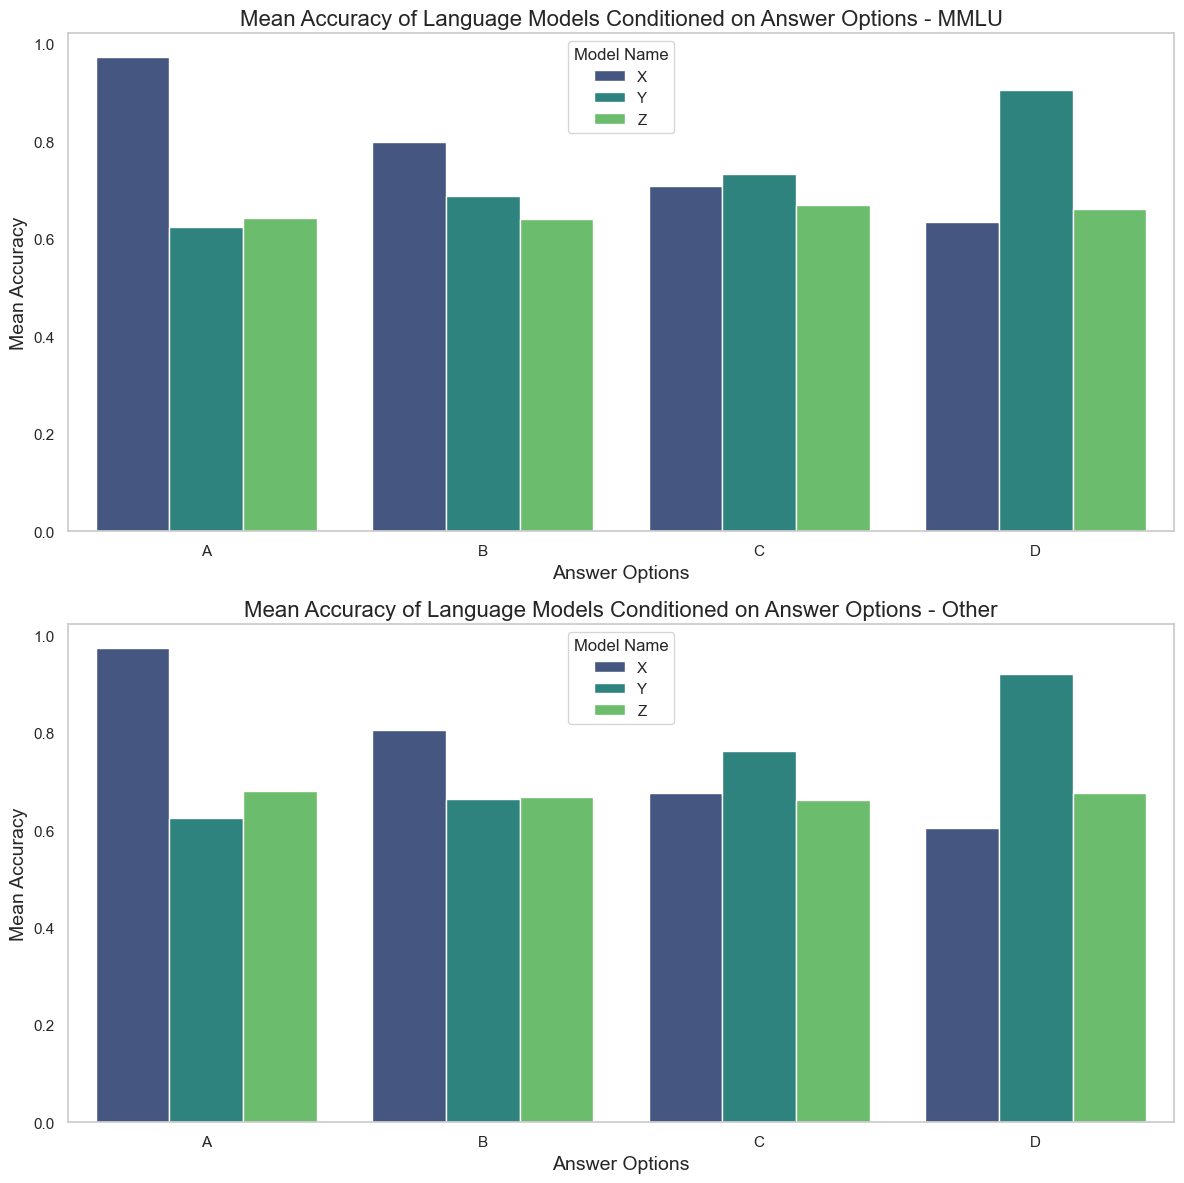

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set_theme(style="whitegrid")

# Create a figure with subplots for each dataset
fig, ax = plt.subplots(2,1, figsize=(12, 12))

# Filter accuracy summary for MMLU dataset
mmlu_data = accuracy_summary[accuracy_summary["dataset"] == "mmlu"]

# Create a bar plot for the MMLU dataset
sns.barplot(data=mmlu_data, x='answer', y='accuracy', hue='model_name', 
            palette='viridis', ax=ax[0], dodge=True)

# Add titles and labels for MMLU
ax[0].set_title('Mean Accuracy of Language Models Conditioned on Answer Options - MMLU', fontsize=16)
ax[0].set_ylabel('Mean Accuracy', fontsize=14)
ax[0].set_xlabel('Answer Options', fontsize=14)
ax[0].legend(title='Model Name')
ax[0].grid(axis='y')

# Filter accuracy summary for Other dataset
other_data = accuracy_summary[accuracy_summary["dataset"] == "other"]

# Create a bar plot for the Other dataset
sns.barplot(data=other_data, x='answer', y='accuracy', hue='model_name', 
            palette='viridis', ax=ax[1], dodge=True)

# Add titles and labels for Other dataset
ax[1].set_title('Mean Accuracy of Language Models Conditioned on Answer Options - Other', fontsize=16)
ax[1].set_ylabel('Mean Accuracy', fontsize=14)
ax[1].set_xlabel('Answer Options', fontsize=14)
ax[1].legend(title='Model Name')
ax[1].grid(axis='y')

# Show the plots
plt.tight_layout()  # Adjusts the subplot parameters to give specified padding
plt.show()


B. /Discuss:/

Independently of the dataset, Model X is doing much better on questions to which the answer is A, compared to other answers. We can observe something similar for model Y and questions with answer D. While model Z however seems to be doing quite badly on all questions.



### 2.5 (2 pt)

Concerned with your findings so far, you quickly consult with Ms. Sakota. After thinking it over, Ms. Sakota concludes that more tests are needed. She orders a second round of MMLU results. However, the clever Ms. Sakota thinks of the following twist: while keeping questions fixed, she randomly permutes the position of the correct answer. The new results can be found in the folder `data/task_2_5/`:
```
task_2_5/
│
└── lm_scores_mmlu_shuffle.csv
```

/Discuss:/ Why would Ms. Sakota do this?

/Discuss:/

Ms. Sakota could have done this, for example :

- To Avoid that the model becomes biased towards a specific answer location. For instance, if the correct answer is always the first one, the model will learn to pick the first one independantly of any correct explanation.

- To confirm if the bias of the models toward a specific answer, by keeping the same dataset and permuting answers, we can conclude if the model is biased toward a single answer or not.
  
- To save time and money. This allows Ms. Sakota to create a "new" dataset for testing the LLM without having to spend much time or money (indeed creating a new dataset means hiring people).

### 2.6 (4 pt)

Increasingly sceptical of the language models' performance, you read up on proper testing practices. You stumble upon the concept of [test-rested stability](https://en.wikipedia.org/wiki/Repeatability), which roughtly states that:

"_Measurements taken by a single person or instrument on the same item, under the same conditions, and in a short period of time, should have the same results._"

In our case, we would assume an LM would have the same performance on a given question regardless of the correct answer position. One way of testing this is by using the following metric:

$$\text{test-retest metric} = \frac{1}{N}\sum_{i=1}^N \frac{1}{M}\sum_{j=1}^M c^i_0 c_j^i,$$

where $c^i_0 \in \{0, 1\}$ indicates whether the model answers the $i^{\text{th}}$ question correctly (1 if correct, 0 if incorrect). $c_j^i$ indicates whether the model answers the $i^{\text{th}}$ question correctly in the $j^{\text{th}}$ shuffled version of the answer label content. Finally, $M$ is the total number of shuffles and $N$ is the dataset size.

Task: compute the test-retest metric for each language model using the original `lm_scores_mmlu.csv` file and the new `lm_scores_mmlu_shuffle.csv` file. Using a bar plot, visualize your results by comparing the accuracy of the original `lm_scores_mmlu.csv` and the test-retest scores.

**hints**
- what is $M$ in our case?

(bonus: no points, but so much sweet, sweet knowledge - check out [the following article](https://arxiv.org/pdf/2406.19470v1))

In [77]:
# Load the new dataset
df_mmlu = pd.read_csv('data/task_2/lm_scores_mmlu.csv')
df_mmlu_shuffle = pd.read_csv("data/task_2_5/lm_scores_mmlu_shuffle.csv")

# merge them
df_trm = pd.merge(left = df_mmlu, 
              right = df_mmlu_shuffle,
              on = ["question_id", "model_name"],
              suffixes=["_normal", "_shuffle"]
              )

print(df_mmlu.shape)
print(df_mmlu_shuffle.shape)
print(df_trm.shape)
df_trm.head(3)
df_trm.columns
display(df_trm.head(2))

(35088, 11)
(35088, 11)
(35088, 20)


,result_normal,question_id,question_normal,A_normal,B_normal,C_normal,D_normal,answer_normal,subject_normal,correct_normal,model_name,result_shuffle,question_shuffle,A_shuffle,B_shuffle,C_shuffle,D_shuffle,answer_shuffle,subject_shuffle,correct_shuffle
0,B,0,Find the degree for the given field extension ...,0,4,2,6,B,abstract algebra,True,X,A,Find the degree for the given field extension ...,4,0,2,6,A,abstract algebra,True
1,C,1,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",8,2,24,120,C,abstract algebra,True,X,C,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",8,2,24,120,C,abstract algebra,True


In [73]:
# calculate accuracy for the un-shuffled model (needed later for comparison)
df_accuracy = pd.DataFrame()

models = df["model_name"].unique()

for model in models:
    df_filtered = df_mmlu[df_mmlu["model_name"] == model]
    df_temp = pd.DataFrame({
        "accuracy": [df_filtered["correct"].sum()/df_filtered.shape[0]],
        "sem": [df_filtered["correct"].sem()],
        "model": [model],
        "dataset": ["mmlu"]
    })
    df_accuracy = pd.concat([df_accuracy, df_temp], ignore_index=True)

display(df_accuracy)


,accuracy,sem,model,dataset
0,0.743588,0.004038,X,mmlu
1,0.761542,0.003941,Y,mmlu
2,0.655951,0.004393,Z,mmlu


In [82]:
# with M = 1 the formula should be:
    # 1/n sum(c_mmlu * c_mmule_shuffled)

trm = []
for model in models:
    df_filtered = df_trm[df_trm["model_name"] == model]
    # print(model)
    # Calculate test retest metric
    c_shuffle = df_filtered["correct_shuffle"] #correct columns of shuffle
    c_normal = df_filtered["correct_normal"] #correct columns of normal
    trm.append(np.mean(c_shuffle * c_normal))

df_accuracy["trm"] = trm

display(df_accuracy)

,accuracy,sem,model,dataset,trm
0,0.743588,0.004038,X,mmlu,0.588406
1,0.761542,0.003941,Y,mmlu,0.571648
2,0.655951,0.004393,Z,mmlu,0.441604


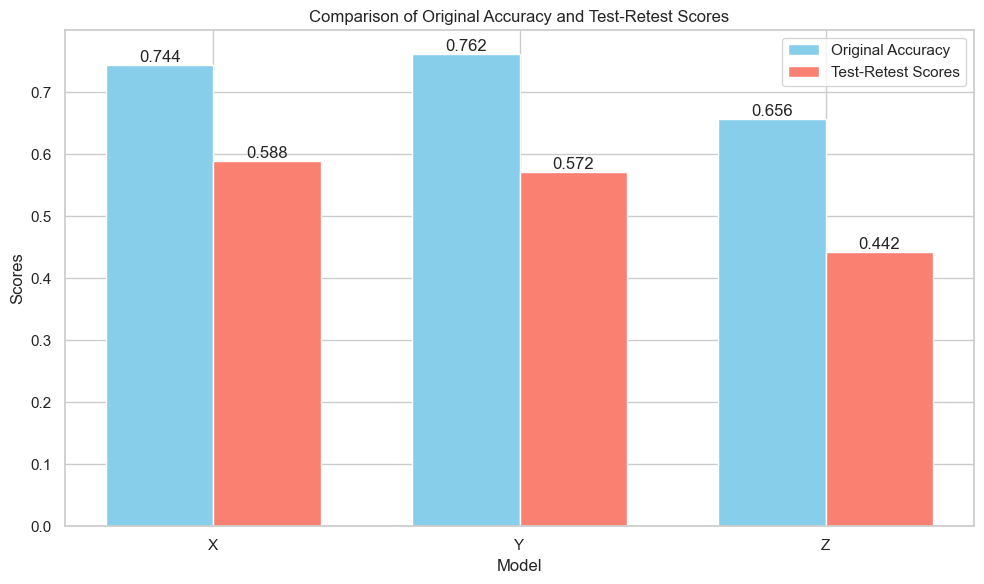

In [79]:
# Setting up the bar plot
bar_width = 0.35  # Width of bars
x = np.arange(len(df_accuracy['model']))  # the label locations

fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for accuracy and trm scores
bars1 = ax.bar(x - bar_width/2, df_accuracy['accuracy'], bar_width, label='Original Accuracy', color='skyblue')
bars2 = ax.bar(x + bar_width/2, df_accuracy['trm'], bar_width, label='Test-Retest Scores', color='salmon')

# Adding labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Original Accuracy and Test-Retest Scores')
ax.set_xticks(x)
ax.set_xticklabels(df_accuracy['model'])
ax.legend()

# Adding value labels on top of bars
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

<!--- discussion MAKE IT BETTER!!!

Model's performance can vary significantly between after 
LM performs well on a training dataset but poorly on new, unseen data (as reflected by a low TRM), it could indicate that the model is overfitting.
The test-retest scores are low for all three models, which confirms that the positioning of the answers makes quite a difference in the answer of the models. --->

### 2.7 (2 pt)

A. Using the unshuffled data: For each LM, print the distribution of the answers they give as well as the accuracy conditioned on the answer they give.

B. /Discuss:/ Describe what you observe

[bonus: not scored, but again _that sweet, sweet knowledge_] Could you think of a plausible explanation?

In [89]:
# A
models = df_mmlu["model_name"].unique()  # Get unique model names from the MMLU dataset

# Create an empty DataFrame to store results
accuracy_summary = pd.DataFrame()

for model in models:
    # MMLU Dataset
    df_model_mmlu = df_mmlu[df_mmlu["model_name"] == model].groupby("result").agg(
        tot_correct=("correct", "sum"), # Total correct answers for each result
        tot=("correct", "size") # Total answers for each result
    )
    #display(df_model_mmlu)

    # Calculate the proportion of each result
    df_model_mmlu["result_proportion"] = df_model_mmlu["tot"] / df_model_mmlu["tot"].sum() 

    # Calculate accuracy conditioned on the result
    df_model_mmlu["accuracy"] = df_model_mmlu["tot_correct"] / df_model_mmlu["tot"]

    # Add model name for clarity
    df_model_mmlu["model_name"] = model
    
    # Append results to the summary DataFrame
    accuracy_summary = pd.concat([accuracy_summary, df_model_mmlu.reset_index()], ignore_index=True)

# Display the summarized accuracy results for all models
display(accuracy_summary)

,result,tot_correct,tot,result_proportion,accuracy,model_name
0,A,1567,4259,0.364142,0.367927,X
1,B,2352,2659,0.227343,0.884543,X
2,C,2409,2409,0.205968,1.000000,X
3,D,2369,2369,0.202548,1.000000,X
4,A,1005,1072,0.091655,0.937500,Y
5,B,2025,2256,0.192886,0.897606,Y
6,C,2496,3015,0.257780,0.827861,Y
7,D,3381,5353,0.457678,0.631608,Y
8,A,1036,2176,0.186047,0.476103,Z
9,B,1887,2885,0.246666,0.654073,Z


B. /Discuss:/

We can observe that both the accuracy and the proportion of results have a wide range of values depending on the result. This is particularily noticeable in models X and Y, X having accuracy ranging from 0.37 to 1.0 and Y having proportions ranging from 0.091 to 0.46.
We can also note that answers with a low proportion like C and D for model X or A for model Y have the best accuracy.

## Task 3 (16 points): What do Questions and Answers look like for a Language Model?

While you feel pretty good about the tests you conducted so far, something still bothers you: what if the language models don't see the data like you do? Suddenly, you receive a phone call from a wise AI sage in the West, _Westoda_:

```
"Hmm, correct you are, young padawan, to question how the world is seen by large language models! Simple 'text' it is not, hmm? No, no, no! Characters and words, the way of puny humans, this is not, heh heh heh.

'Tokens', they use, yes! Mysterious and powerful, these tokens are. Expand our vocabulary, they do, beyond the simple 'a to Z'. Chunky blocks of text, they become, yes! 'Hello world', a simple phrase it may seem. But to a language model, '[24912, 2375]' it might appear, yes! Confusing, it is, hmm?

Wise, it would be, to explore these MMLU data points through the eyes of a language model, you think? Yes, yes! Much to learn, there is. The ways of the tokens, understand you must, if truly comprehend the great LMs, you wish to.
Meditate on this, you should. The force of natural language processing, strong it is. But patience, you must have, my young padawan. For only through great study and contemplation, will the mysteries of the tokens reveal themselves to you, they will. Yes, hmmm!"
```

Admittingly, Westoda at times speaks in riddles… However, he was explaining a crucial aspect of modern LMs called [Tokenization](https://learn.microsoft.com/en-us/dotnet/ai/conceptual/understanding-tokens):


“Tokens are words, character sets, or combinations of words and punctuation that are used by [language models (LMs)] to decompose text into. Tokenization is the first step in training”

Instead of characters, LMs process natural language using “tokens”. While this is useful for a number of reasons, it does at times introduce some “unintuitive” behavior…

In [90]:
# PROVIDED CODE

try:
    import tiktoken
except Exception as e:
    print('installing tiktoken package')
    
    !pip install tiktoken
    
    import tiktoken

def tokenize_text(s):
    enc = tiktoken.encoding_for_model('gpt-4o')
    tokens = enc.encode(str(s))
    return tokens

example_string = 'hello world'
print(f'humans see: "{example_string}" --> language models see: {tokenize_text(example_string)}')

humans see: "hello world" --> language models see: [24912, 2375]


### 3.1 (5 pt)

Use the provided code in the cell above to "see the world through the eyes of a language model":

A. Tokenize the questions of the original MMLU data provided in task 1: `task_1/mmlu_data/test.csv` and plot the token distribution (the frequency of each token).

B. Same as (A), but now for the answers in columns (columns "A", "B", "C", and "D").

C. Isolate the tokens for the strings "A", "B", "C", and "D", then, for their occurances in both questions and answers, print their relative distribution to each other.

**hint**
- There are a _lot_ of tokens, consider using a cutoff point and log scale
- For (c), they should sum to 1

In [91]:
# A

df_test_tokenized = df_test.copy()

df_test_tokenized["tokenized_question"] = df_test_tokenized["question"].apply(lambda s : tokenize_text(s))

df_test_tokenized.head()

,question,A,B,C,D,answer,subject,question_id,tokenized_question
0,Find the degree for the given field extension ...,0,4,2,6,B,abstract algebra,0,"[11437, 290, 9882, 395, 290, 4335, 3259, 15369..."
1,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",8,2,24,120,C,abstract algebra,1,"[12845, 275, 314, 350, 16, 11, 220, 17, 11, 22..."
2,Find all zeros in the indicated finite field o...,0,1,"0,1","0,4",D,abstract algebra,2,"[11437, 722, 42274, 306, 290, 26832, 73104, 32..."
3,Statement 1 | A factor group of a non-Abelian ...,"True, True","False, False","True, False","False, True",B,abstract algebra,3,"[9900, 220, 16, 1022, 355, 12332, 3566, 328, 2..."
4,Find the product of the given polynomials in t...,2x^2 + 5,6x^2 + 4x + 6,0,x^2 + 1,B,abstract algebra,4,"[11437, 290, 1888, 328, 290, 4335, 1823, 17403..."


In [92]:
def get_all_tokens(token_series: pd.Series) -> pd.Series:
    # concatenate all tokens in the series
    all_tokens = []
    for tokens in token_series:
        all_tokens.extend(tokens)

    # create a series from the list of tokens
    return pd.Series(all_tokens)

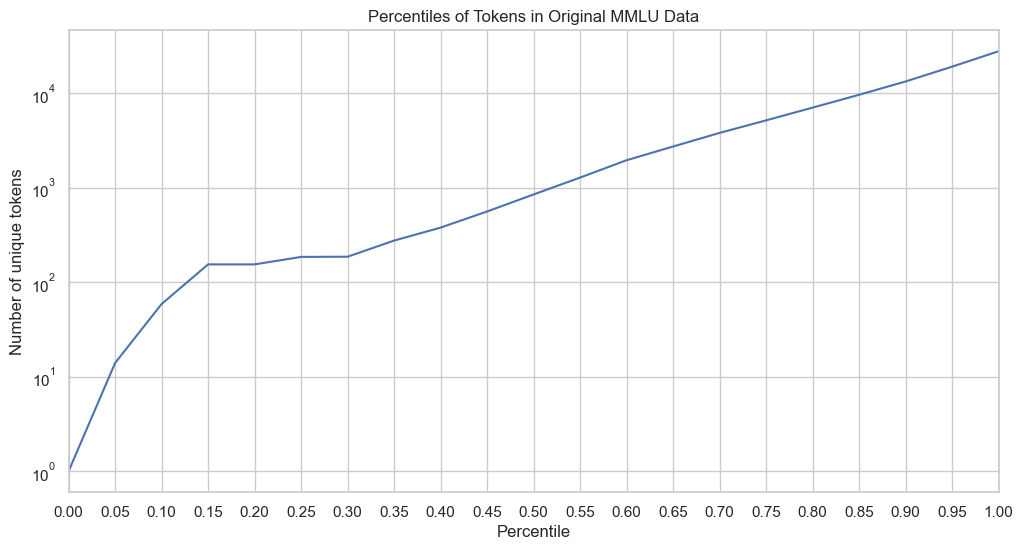

In [93]:
# count the number of times each token appears
sr_question_tokens = get_all_tokens(df_test_tokenized["tokenized_question"])

# find the percentiles of the tokens
percentiles = np.arange(0, 1.01, 0.05)
token_percentiles = sr_question_tokens.quantile(percentiles)

# count the number of unique tokens in each percentile
count_unique_tokens = token_percentiles.apply(
    lambda x: sr_question_tokens[sr_question_tokens <= x].nunique()
)

plt.figure(figsize=(12, 6))

count_unique_tokens.plot(logy=True)

plt.title("Percentiles of Tokens in Original MMLU Data")
plt.ylabel("Number of unique tokens")
plt.xlabel("Percentile")
plt.xticks(percentiles)
plt.xlim(0, 1)

plt.show()

In [94]:
# stats about the cut-off point
cut_off_point = int(sr_question_tokens.quantile(0.3))
print("Cut-off point:", cut_off_point)
sr_question_tokens_cut = sr_question_tokens[sr_question_tokens <= cut_off_point]
print("Number unique of tokens <= cut-off point:", sr_question_tokens_cut.nunique())
print("Number of tokens <= cut-off point:", len(sr_question_tokens))

Cut-off point: 328
Number unique of tokens <= cut-off point: 187
Number of tokens <= cut-off point: 801983


In [95]:
# We can see the distribution is right-skewed and the number of unique tokens starts increasing significantly after 0.3.
# As the point still keeps a reasonable amount of unique tokens, we choose 30th percentile as the cut-off point.
sr_question_tokens_cut_freq = sr_question_tokens_cut.value_counts() / len(sr_question_tokens_cut)

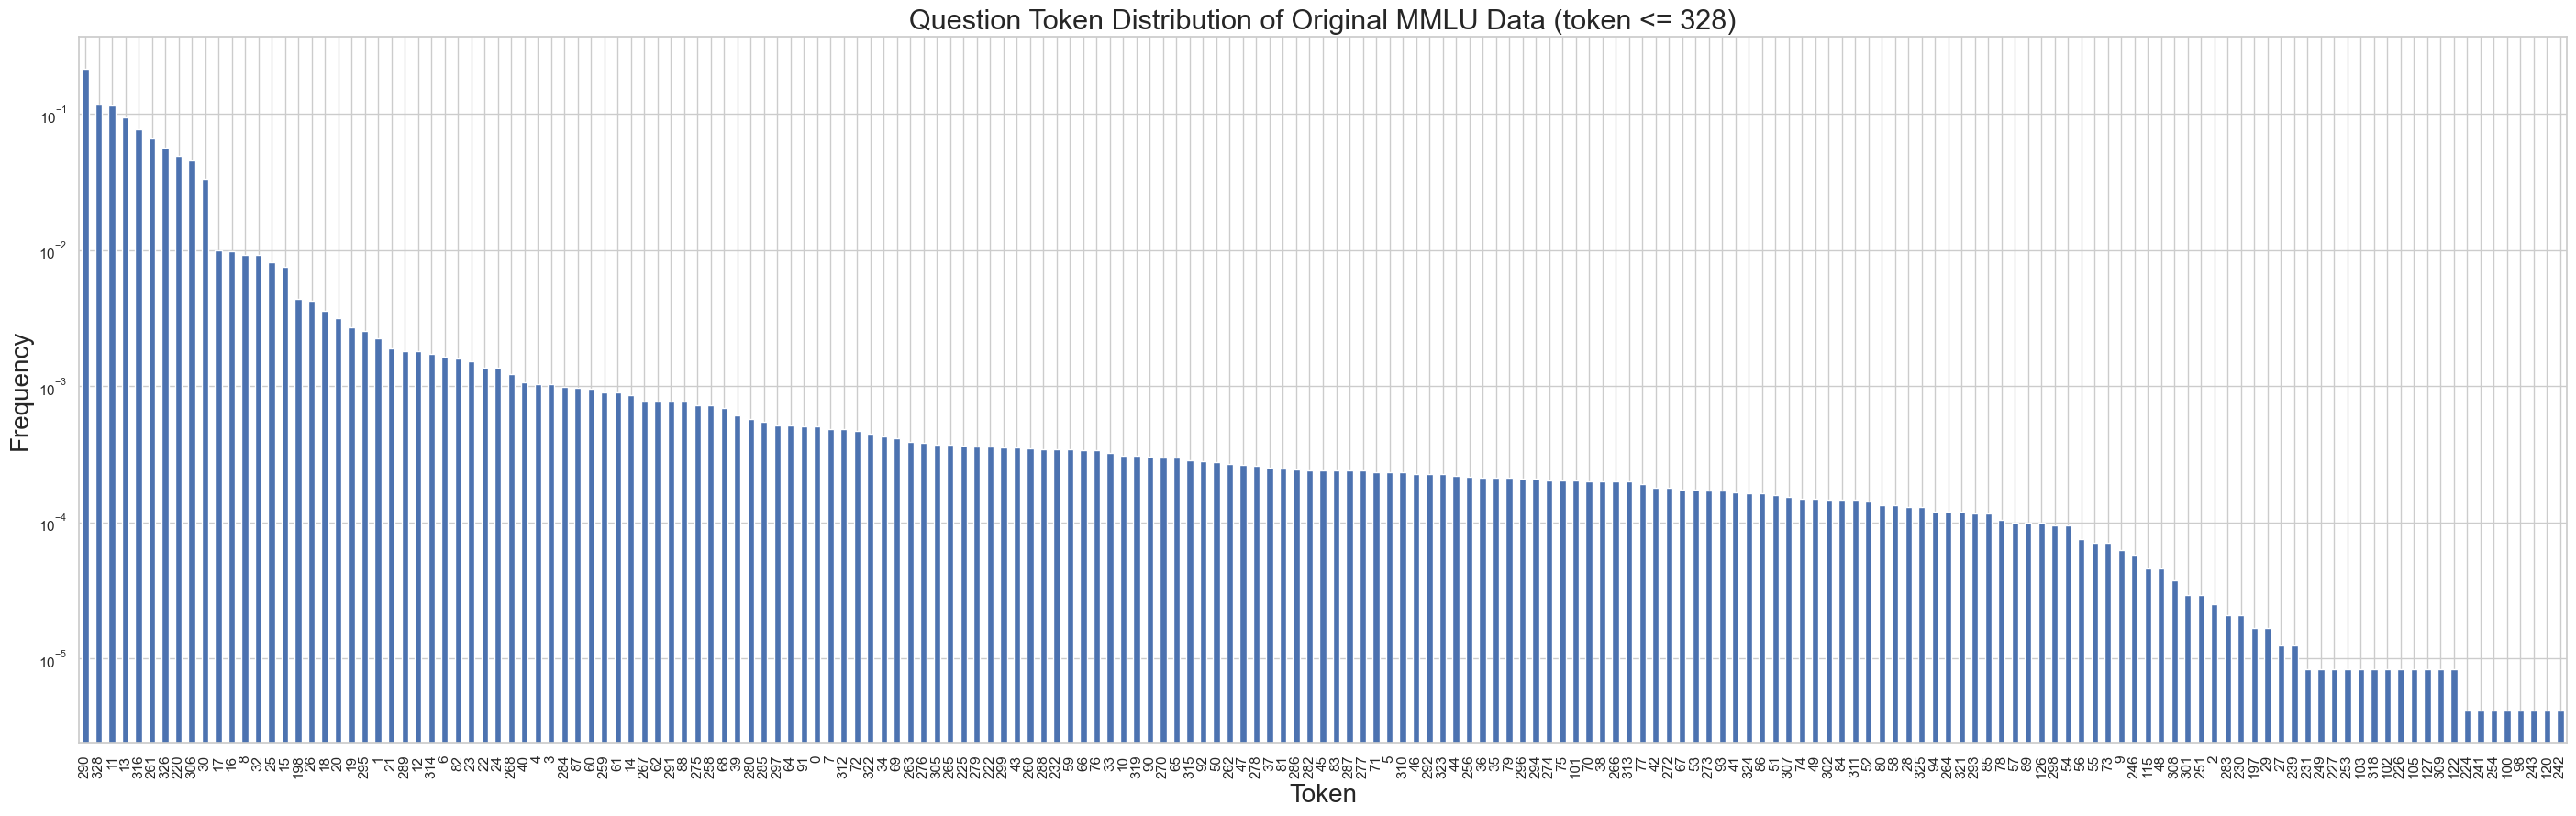

In [96]:
# Plot the token distribution

plt.figure(figsize=(35, 10))

sr_question_tokens_cut_freq.plot(kind="bar", logy=True)

plt.title(
    f"Question Token Distribution of Original MMLU Data (token <= {cut_off_point})",
    fontsize=22,
)
plt.ylabel("Frequency", fontsize=20)
plt.xlabel("Token", fontsize=20)

plt.show()


In [97]:
# B

# tokenize the answers
df_test_tokenized["tokenized_A"] = df_test_tokenized["A"].apply(lambda s : tokenize_text(s))
df_test_tokenized["tokenized_B"] = df_test_tokenized["B"].apply(lambda s : tokenize_text(s))
df_test_tokenized["tokenized_C"] = df_test_tokenized["C"].apply(lambda s : tokenize_text(s))
df_test_tokenized["tokenized_D"] = df_test_tokenized["D"].apply(lambda s : tokenize_text(s))

df_test_tokenized.head()

,question,A,B,C,D,answer,subject,question_id,tokenized_question,tokenized_A,tokenized_B,tokenized_C,tokenized_D
0,Find the degree for the given field extension ...,0,4,2,6,B,abstract algebra,0,"[11437, 290, 9882, 395, 290, 4335, 3259, 15369...",[15],[19],[17],[21]
1,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",8,2,24,120,C,abstract algebra,1,"[12845, 275, 314, 350, 16, 11, 220, 17, 11, 22...",[23],[17],[1494],[6106]
2,Find all zeros in the indicated finite field o...,0,1,"0,1","0,4",D,abstract algebra,2,"[11437, 722, 42274, 306, 290, 26832, 73104, 32...",[15],[16],"[15, 11, 16]","[15, 11, 19]"
3,Statement 1 | A factor group of a non-Abelian ...,"True, True","False, False","True, False","False, True",B,abstract algebra,3,"[9900, 220, 16, 1022, 355, 12332, 3566, 328, 2...","[4710, 11, 6432]","[8168, 11, 7983]","[4710, 11, 7983]","[8168, 11, 6432]"
4,Find the product of the given polynomials in t...,2x^2 + 5,6x^2 + 4x + 6,0,x^2 + 1,B,abstract algebra,4,"[11437, 290, 1888, 328, 290, 4335, 1823, 17403...","[17, 87, 61, 17, 659, 220, 20]","[21, 87, 61, 17, 659, 220, 19, 87, 659, 220, 21]",[15],"[87, 61, 17, 659, 220, 16]"


In [98]:
# Count the number of times each token appears
# We use the same cut-off point as before to keep the same range of unique tokens

sr_A_tokens = get_all_tokens(df_test_tokenized["tokenized_A"])
sr_A_tokens_cut = sr_A_tokens[sr_A_tokens <= cut_off_point]
sr_A_token_counts_cut = sr_A_tokens_cut.value_counts()
sr_A_token_counts_cut_freq = sr_A_token_counts_cut / len(sr_A_tokens_cut)

sr_B_tokens = get_all_tokens(df_test_tokenized["tokenized_B"])
sr_B_tokens_cut = sr_B_tokens[sr_B_tokens <= cut_off_point]
sr_B_token_counts_cut = sr_B_tokens_cut.value_counts()
sr_B_token_counts_cut_freq = sr_B_token_counts_cut / len(sr_B_tokens_cut)

sr_C_tokens = get_all_tokens(df_test_tokenized["tokenized_C"])
sr_C_tokens_cut = sr_C_tokens[sr_C_tokens <= cut_off_point]
sr_C_token_counts_cut = sr_C_tokens_cut.value_counts()
sr_C_token_counts_cut_freq = sr_C_token_counts_cut / len(sr_C_tokens_cut)

sr_D_tokens = get_all_tokens(df_test_tokenized["tokenized_D"])
sr_D_tokens_cut = sr_D_tokens[sr_D_tokens <= cut_off_point]
sr_D_token_counts_cut = sr_D_tokens_cut.value_counts()
sr_D_token_counts_cut_freq = sr_D_token_counts_cut / len(sr_D_tokens_cut)

dict_answer_token_cut_counts = {
    "A": sr_A_token_counts_cut_freq,
    "B": sr_B_token_counts_cut_freq,
    "C": sr_C_token_counts_cut_freq,
    "D": sr_D_token_counts_cut_freq,
}


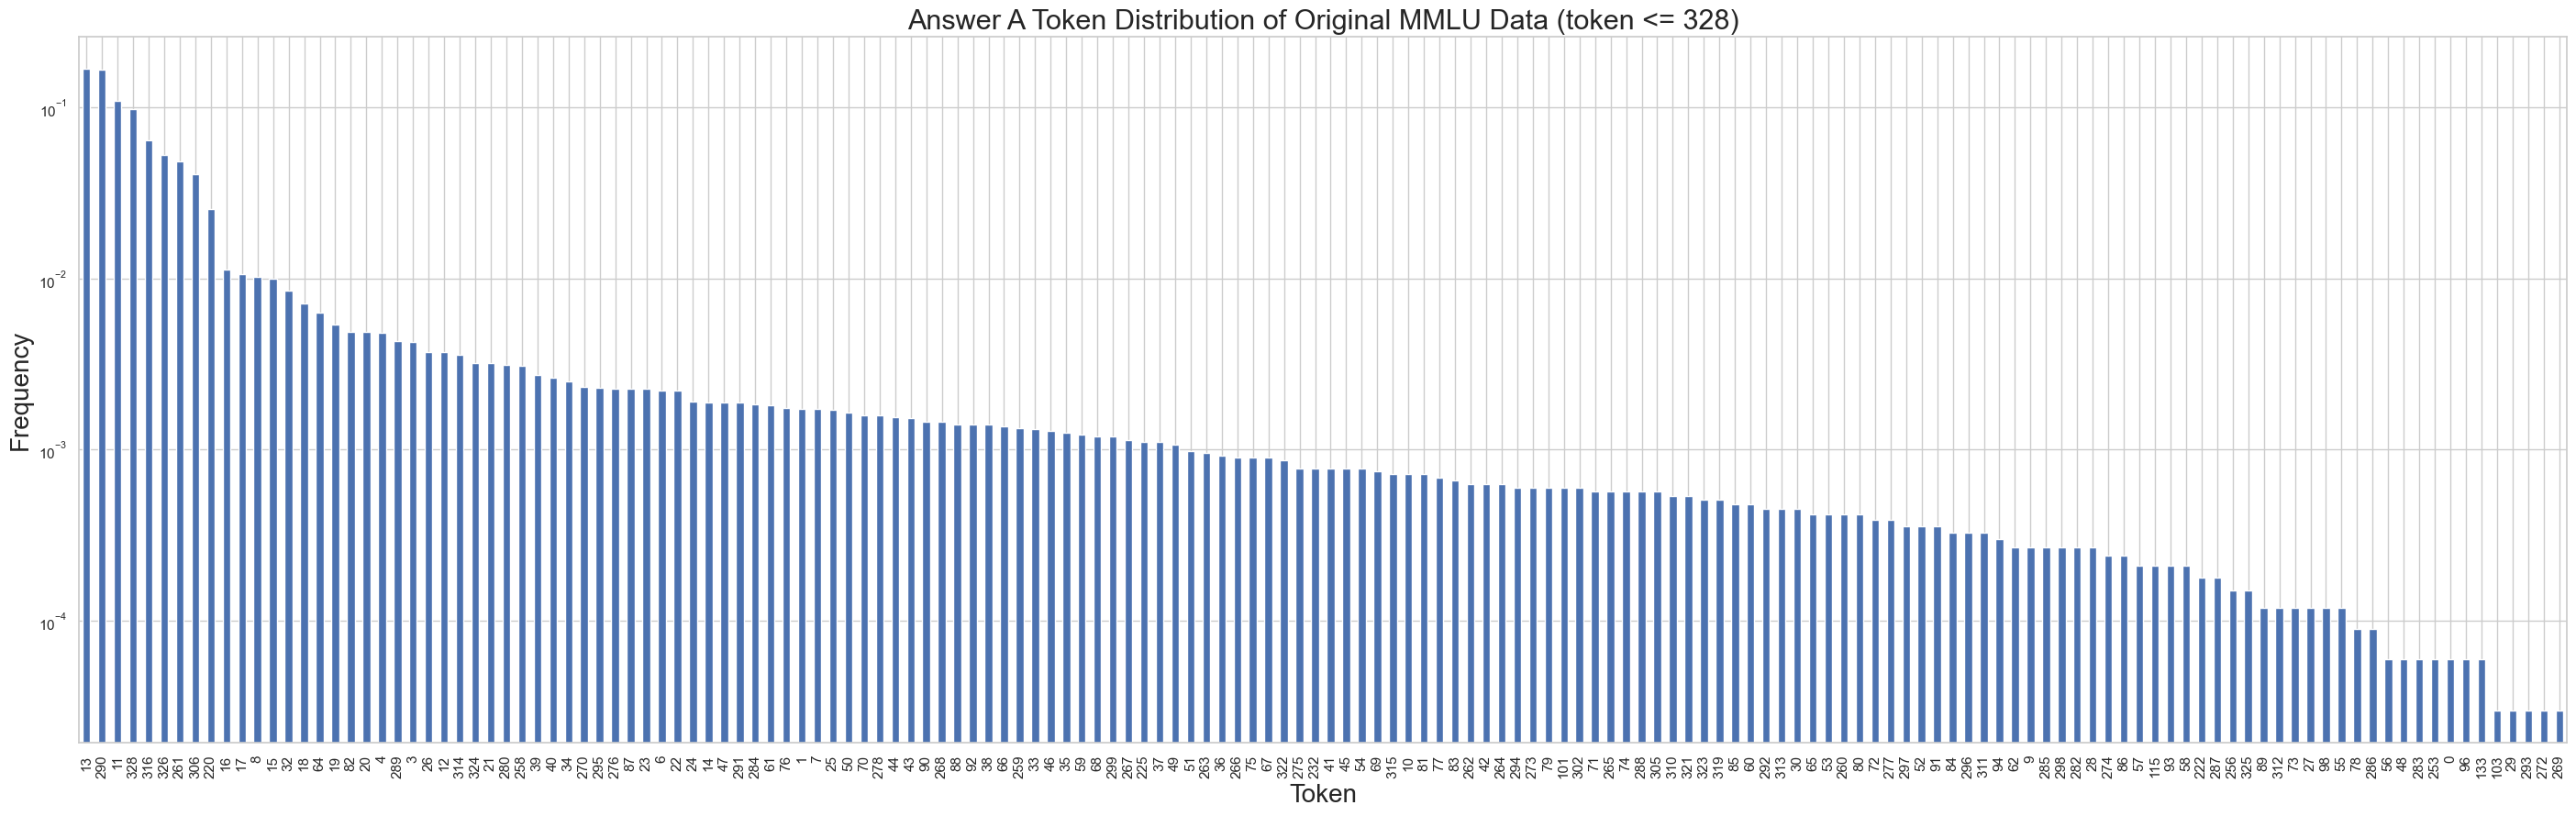

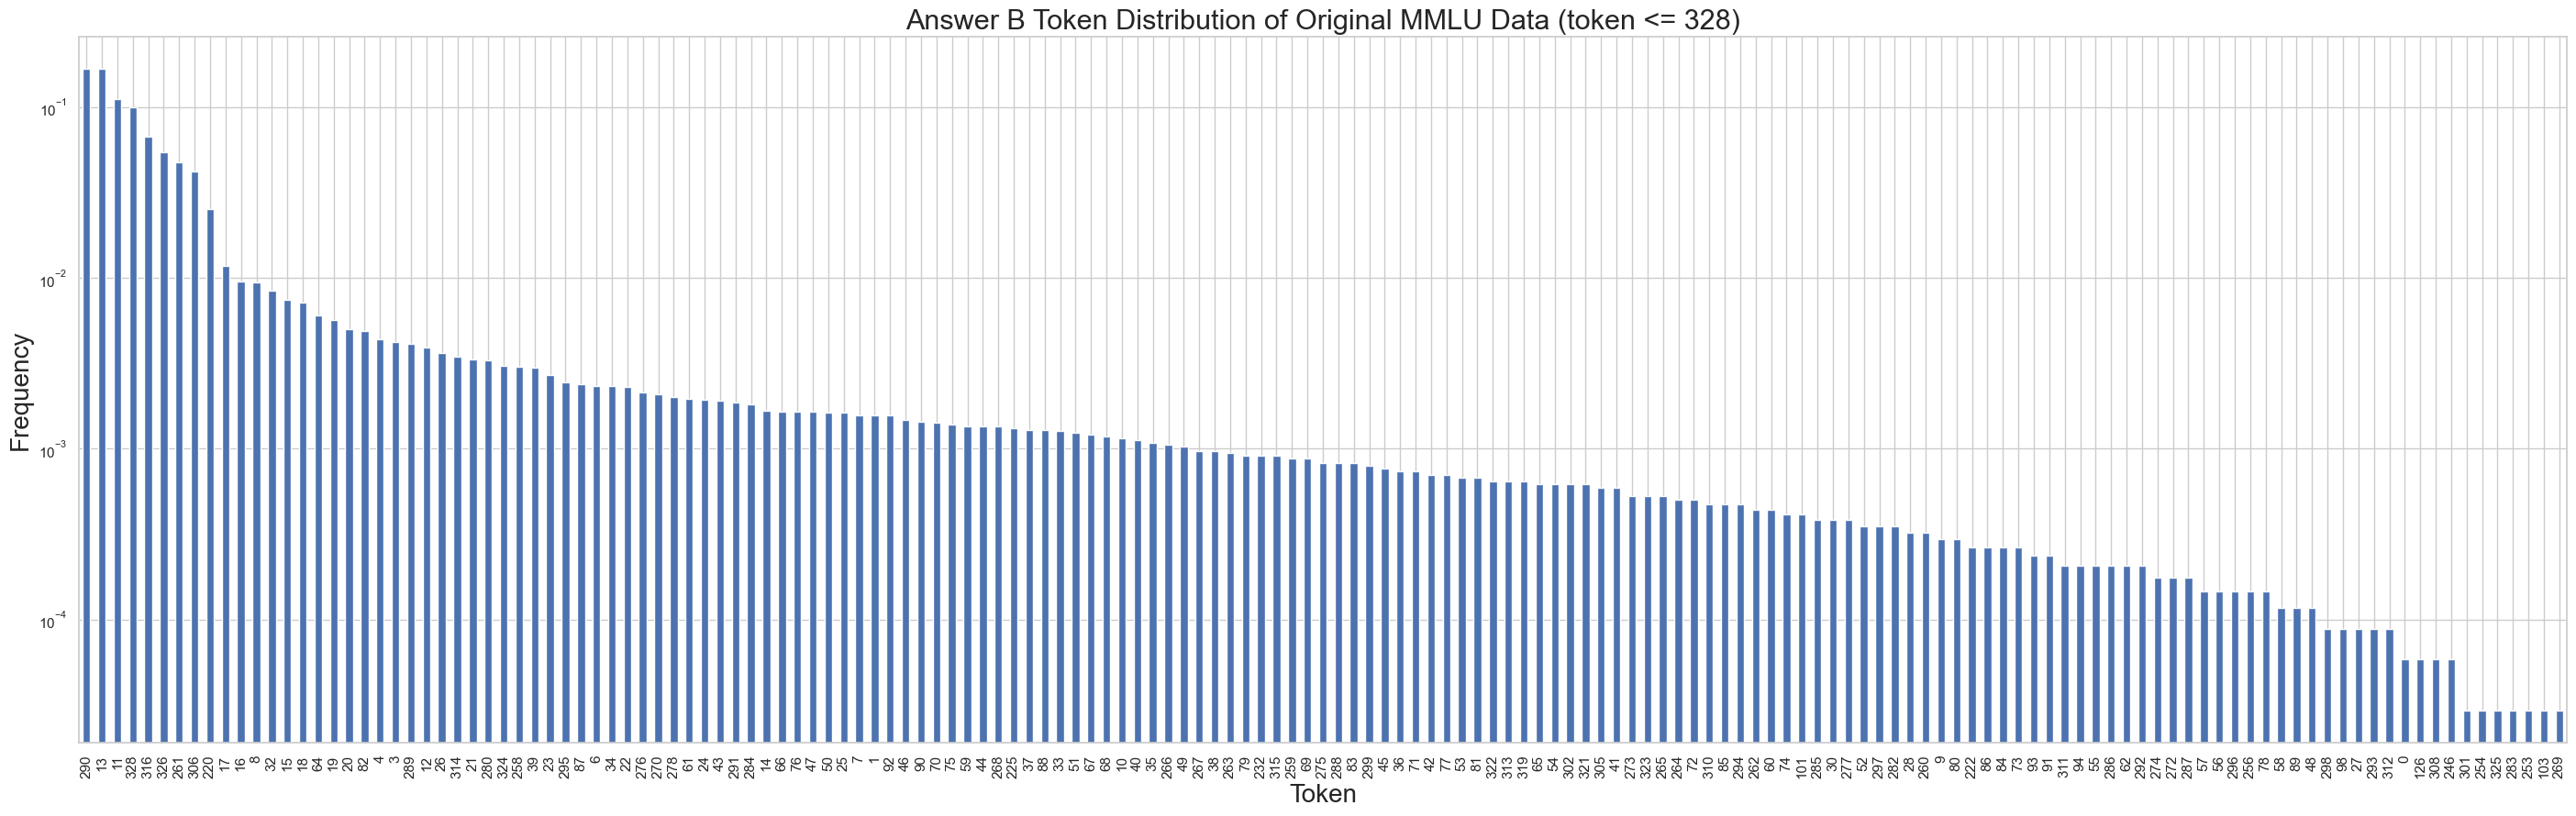

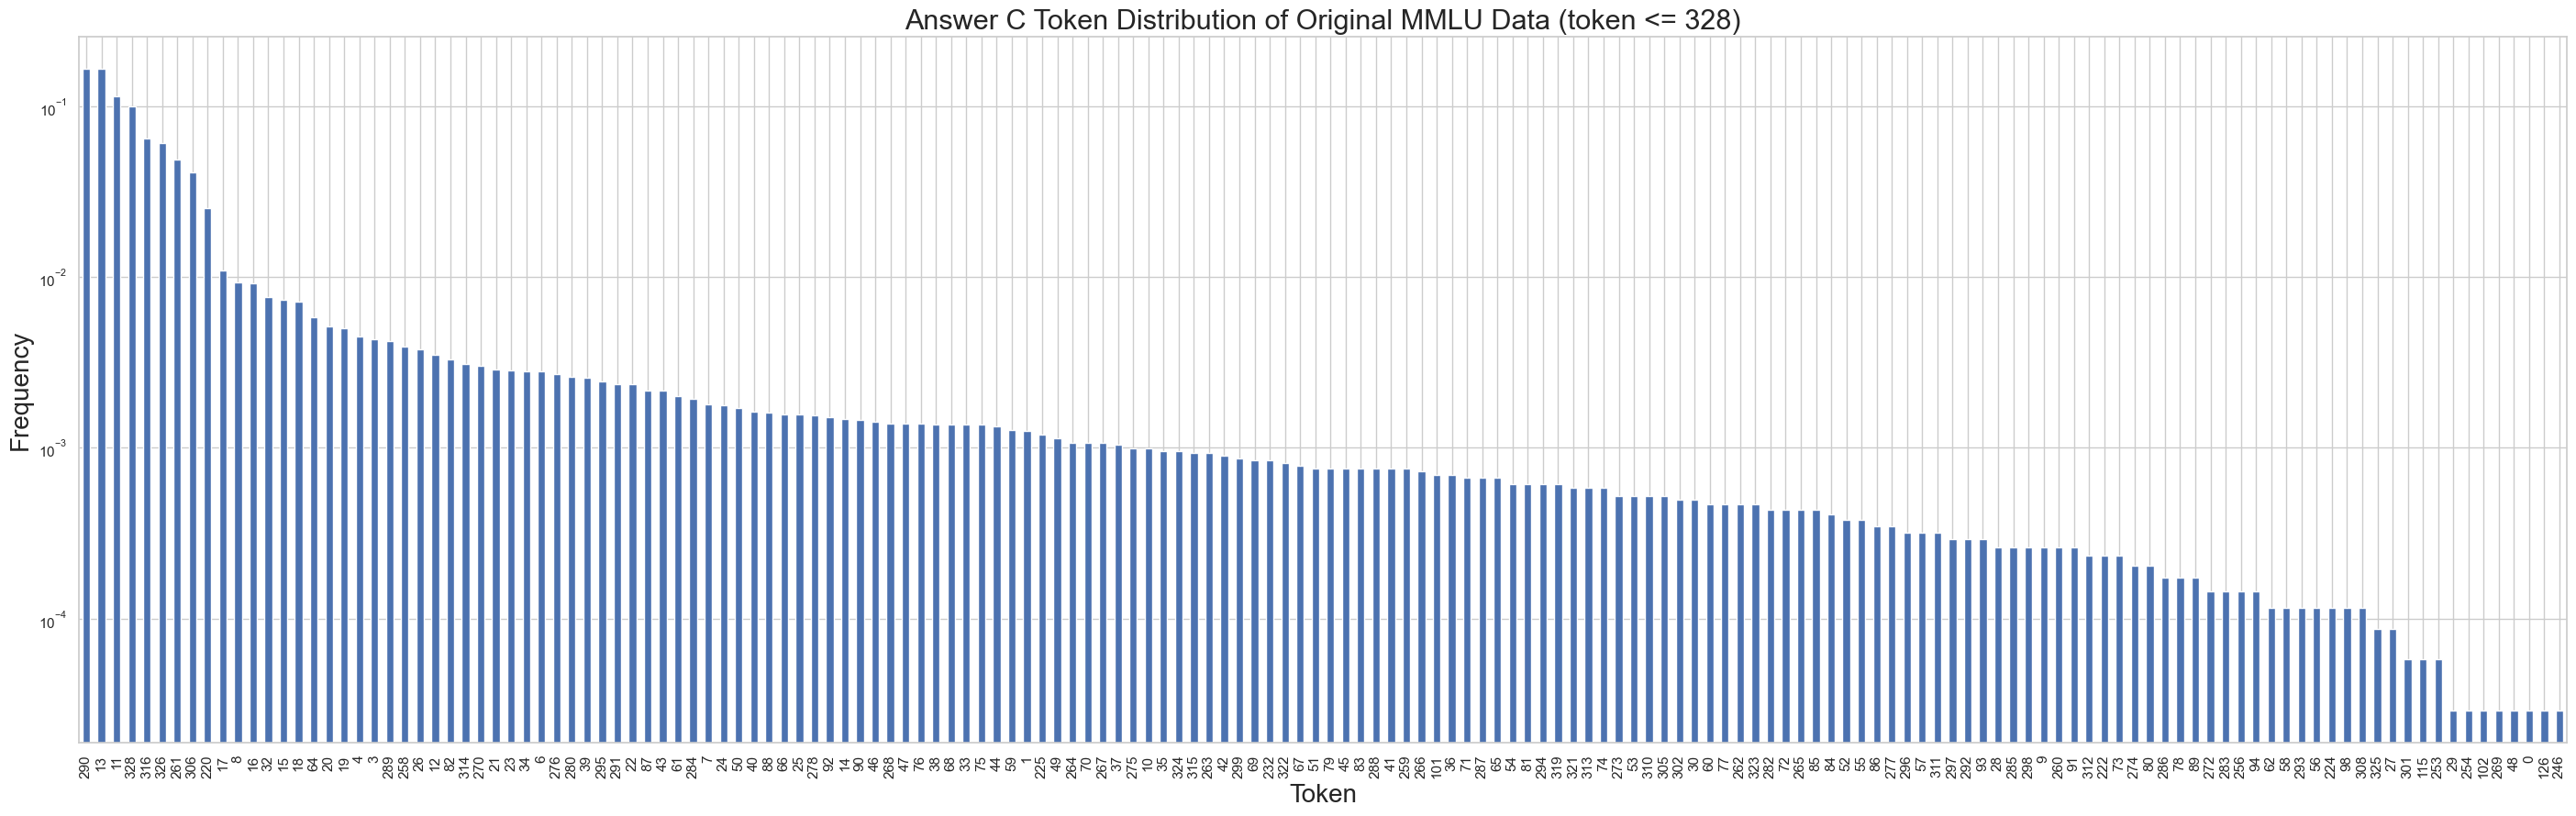

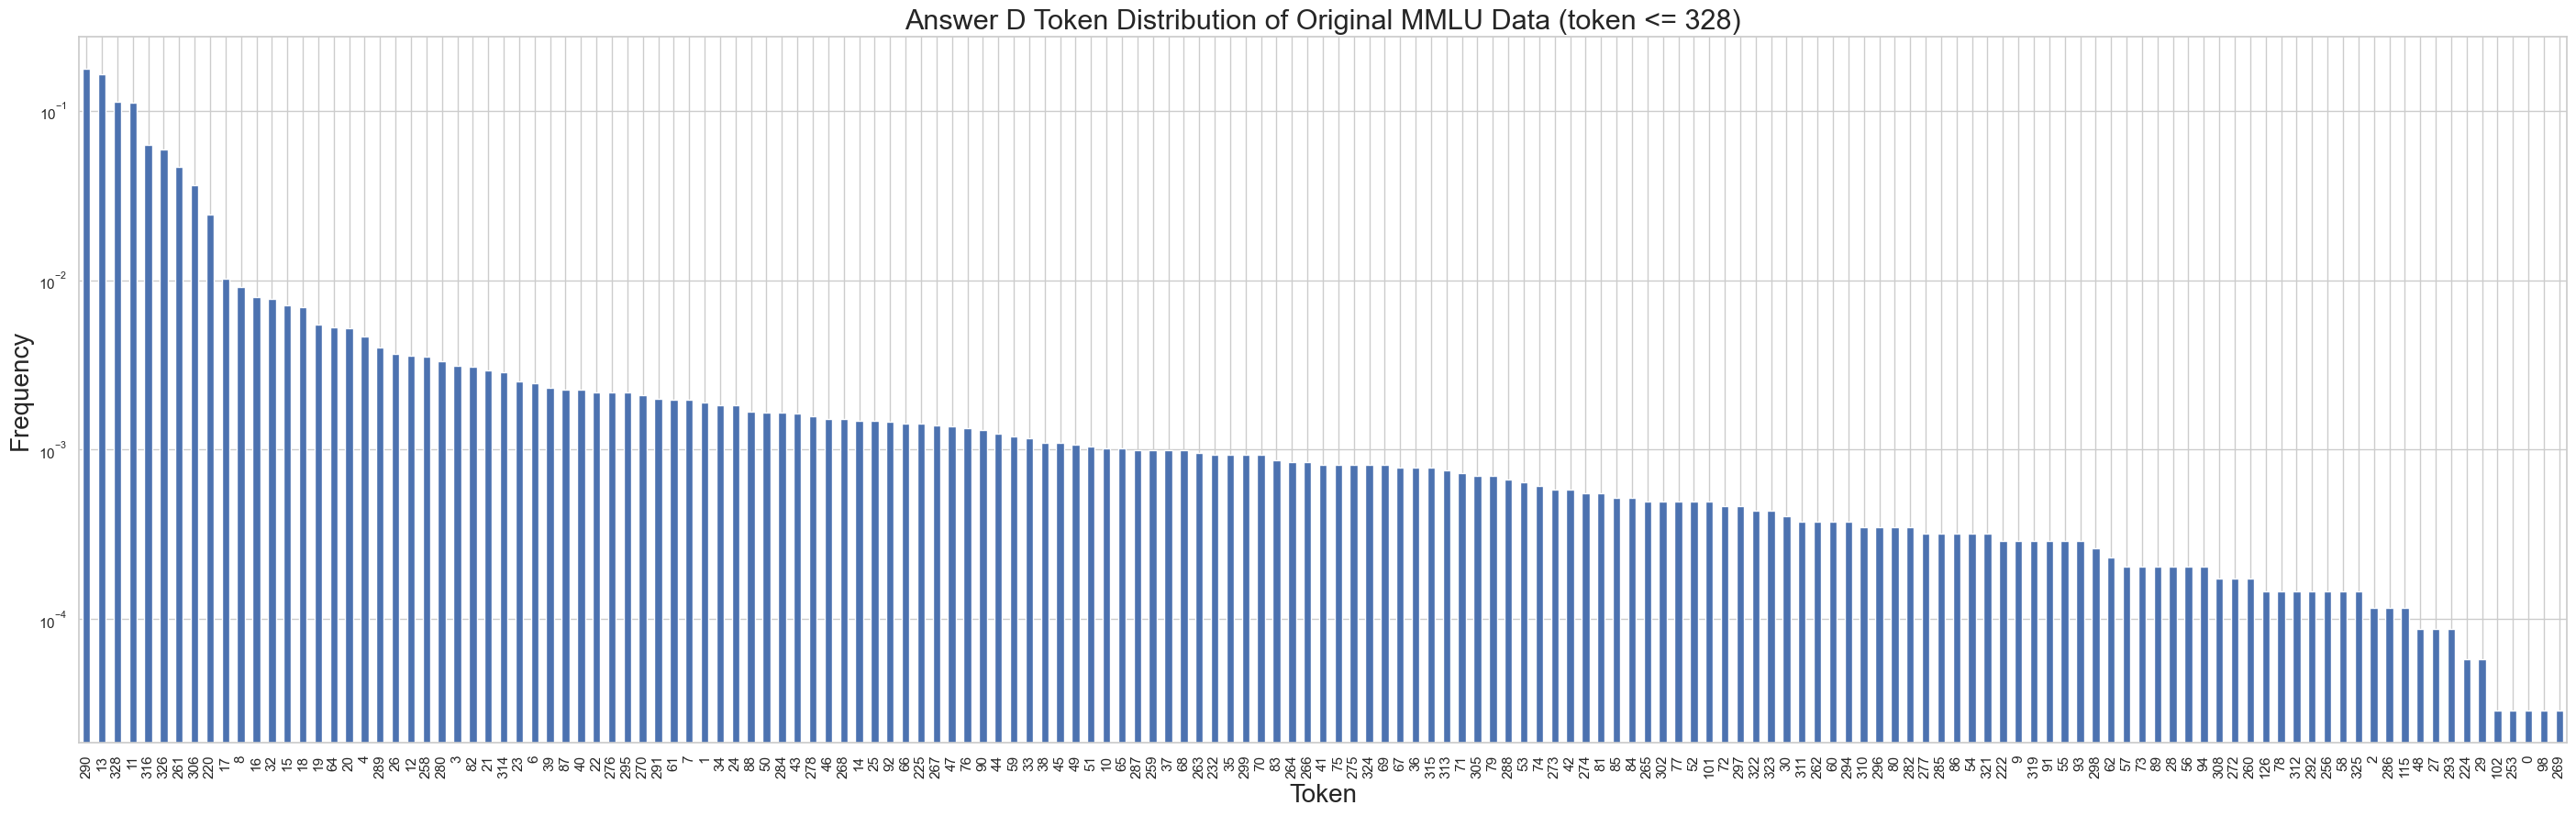

In [99]:
# Plot the token distribution

for answer, freq in dict_answer_token_cut_counts.items():

    plt.figure(figsize=(35, 10))

    freq.plot(kind="bar", logy=True)

    plt.title(
        f"Answer {answer} Token Distribution of Original MMLU Data (token <= {cut_off_point})",
        fontsize=22,
    )
    plt.ylabel("Frequency", fontsize=20)
    plt.xlabel("Token", fontsize=20)

    plt.show()

In [100]:
# C

# build a dictionary of "A", "B", "C", "D" tokens
iso_chars = ["A", "B", "C", "D"]
dict_ABCD_token = {k: tokenize_text(k)[0] for k in iso_chars}

# find the occurances of "A", "B", "C", "D" in the questions and answers
for char, token in dict_ABCD_token.items():
    df_test_tokenized[f"{char}_occur_pair"] = df_test_tokenized[
        "tokenized_question"
    ].apply(lambda x: token in x) | df_test_tokenized[f"tokenized_{char}"].apply(
        lambda x: token in x
    )

# count the number of occurances
df_chars = pd.DataFrame.from_dict(dict_ABCD_token, orient="index").reset_index()
df_chars.columns = ["char", "token"]
df_chars["count_occur_question_answers"] = df_chars["char"].apply(
    lambda x: df_test_tokenized[f"{x}_occur_pair"].sum()
)

# compute the relative distribution
df_chars["count_occur_question_answers_rel"] = (
    df_chars["count_occur_question_answers"]
    / df_chars["count_occur_question_answers"].sum()
)

print("Relative distribution of A, B, C, D tokens occuring in both the questions and answers:")
display(df_chars[["char", "count_occur_question_answers_rel"]])

Relative distribution of A, B, C, D tokens occuring in both the questions and answers:


,char,count_occur_question_answers_rel
0,A,0.871693
1,B,0.036970
2,C,0.063066
3,D,0.028271


### 3.2 (3 pt)

What if the number of "A", "B", "C", and "D" tokens in the question and answer pairs could influence a language model's decisions?

A. For each combined question-answers pair, compute: 
1. the number of "A", "B", "C", and "D" tokens; and
2. the total number of tokens.
3. then, group by the "correct" answer and compute the mean frequency of A, B, C, and D tokens and the total number of tokens. 
4. finally, print your results

B. /Discuss:/ What do you think of the hypothesis that the frequency of A, B, C, and D tokens could influence answers?


In [102]:
# A

new_col_name_total = "token_total"

# count the number of total tokens in the question
df_test_tokenized[new_col_name_total] = df_test_tokenized[
    "tokenized_question"
].apply(len)

# compute number of tokens in question-answer pairs
for char, token in dict_ABCD_token.items():
    new_col_name_count = f"token_{char}_count"
    # count the number of times the token appears in the question
    df_test_tokenized[new_col_name_count] = df_test_tokenized[
        "tokenized_question"
    ].apply(lambda x: x.count(token))

    for c in iso_chars:
        # add the number of times the token appears in the answers in new_col_name_count
        df_test_tokenized[new_col_name_count] += df_test_tokenized[
            f"tokenized_{c}"
        ].apply(lambda x: x.count(token))

        # add the number of total tokens in the answers in new_col_name_total
        df_test_tokenized[new_col_name_total] += df_test_tokenized[
            f"tokenized_{c}"
        ].apply(len)

df_test_tokenized.head(3)

,question,A,B,C,D,answer,subject,question_id,tokenized_question,tokenized_A,...,tokenized_D,A_occur_pair,B_occur_pair,C_occur_pair,D_occur_pair,token_total,token_A_count,token_B_count,token_C_count,token_D_count
0,Find the degree for the given field extension ...,0,4,2,6,B,abstract algebra,0,"[11437, 290, 9882, 395, 290, 4335, 3259, 15369...",[15],...,[21],False,False,False,False,41,0,0,0,0
1,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",8,2,24,120,C,abstract algebra,1,"[12845, 275, 314, 350, 16, 11, 220, 17, 11, 22...",[23],...,[6106],False,False,False,False,53,0,0,0,0
2,Find all zeros in the indicated finite field o...,0,1,"0,1","0,4",D,abstract algebra,2,"[11437, 722, 42274, 306, 290, 26832, 73104, 32...",[15],...,"[15, 11, 19]",False,False,False,False,71,0,0,0,0


In [104]:
# group by answer
group_by_answer = df_test_tokenized.groupby("answer").agg(
    mean_freq_char_A = ("token_A_count", "mean"),
    mean_freq_char_B = ("token_B_count", "mean"),
    mean_freq_char_C = ("token_C_count", "mean"),
    mean_freq_char_D = ("token_D_count", "mean"),
    mean_freq_total_pair = ("token_total", "mean"),
)

group_by_answer

,mean_freq_char_A,mean_freq_char_B,mean_freq_char_C,mean_freq_char_D,mean_freq_total_pair
answer,,,,,
A,0.243017,0.018932,0.025140,0.013035,198.460894
B,0.231947,0.019642,0.029463,0.012709,188.203351
C,0.226410,0.018984,0.034897,0.015355,196.637912
D,0.242850,0.014566,0.030985,0.014301,198.307468


B. /Discuss:/

The mean frequency of each answer letter is remarkably similar, indicating that the model does not appear to select answers based solely on the frequency of tokens associated with those letters. Notably, the frequency of the letter "A" is significantly higher than that of the other letters across all answers provided by the model. This discrepancy is likely due to the inclusion of "A" as an article, which inflates its overall count. Consequently, we conclude that individual letters do not significantly influence the model's answer selection process.

### 3.3 (4 pt)

Three of the most important considerations when deciding between language models are:

Quality
Costs
Speed

So far, much of your analysis has focused on quality. However, the government has indicated that they are quite concerned about both the total costs and speed as well. Specifically, it has been brought to their attention that a new `turbo` model has been launched! 

This model is both cheaper and faster than the models you evaluated so far. However, there is a catch: the context length* is much smaller than that of the other LMS. Namely, it can only process **300** tokens during inference. Meanwhile, the other models can process up to 100K tokens! 

*_The “context length” refers to the number of tokens that can be given to an LM as input._

A. Are there subjects where using the cheaper model might be problematic? I.e., where part of the question and answer(s) might not fit completely in the context?

B. /Discuss:/ Can you think of a strategy that would balance the needs of the government?

**hint**:
- An LM needs to have both the question and the different answer options in its context

In [105]:
# A

# find context that exceeds 300 tokens
# original_count --> total number of questions (of that category)
# count --> total number of questions (of that category) that have more than 300 tokens (counting both qeustion and answers)
df_test_tokenized["context"] = (
    df_test_tokenized["tokenized_question"]
    + df_test_tokenized["tokenized_A"]
    + df_test_tokenized["tokenized_B"]
    + df_test_tokenized["tokenized_C"]
    + df_test_tokenized["tokenized_D"]
)

# find questions that exceed 300 tokens
df_token_exceeded = df_test_tokenized[df_test_tokenized["context"].apply(len) > 300]

# calculate the number of subjects that exceed 300 tokens
# columns: subject, count
df_subject_exceeded = df_token_exceeded["subject"].value_counts().reset_index()

# calculate the total number of questions (of that category)
df_subject_exceeded["original_count"] = df_subject_exceeded["subject"].apply(
    lambda x: df_test_tokenized[df_test_tokenized["subject"] == x].shape[0]
)

# calculate the rate
df_subject_exceeded["rate"] = (
    df_subject_exceeded["count"] / df_subject_exceeded["original_count"]
)
df_subject_exceeded

,subject,count,original_count,rate
0,professional law,315,1534,0.205346
1,high school world history,122,237,0.514768
2,high school european history,93,165,0.563636
3,high school us history,85,204,0.416667
4,professional medicine,14,272,0.051471
5,college medicine,5,173,0.028902
6,security studies,4,245,0.016327
7,high school computer science,1,100,0.010000
8,high school statistics,1,216,0.004630
9,virology,1,166,0.006024


In [108]:
# find problematic subjects and that significantly affected, i.e overcame a specififc threshold
thr=0.1
problemal_subject = df_subject_exceeded["subject"]
significant_subject = df_subject_exceeded[df_subject_exceeded["rate"] > thr]["subject"]
print("Affected subjects:")
for subject in problemal_subject:
    print("\t", subject)
print(f"Problematic subjects (significantly affected, with rate > {thr}):")
for subject in significant_subject:
    print("\t", subject)

Affected subjects:
	 professional law
	 high school world history
	 high school european history
	 high school us history
	 professional medicine
	 college medicine
	 security studies
	 high school computer science
	 high school statistics
	 virology
Problematic subjects (significantly affected, with rate > 0.1):
	 professional law
	 high school world history
	 high school european history
	 high school us history


B. /Dicsuss:/

We could:

- Implement a Hybrid Solution: Use the original model for subjects significantly impacted by the context limit, such as law and history, while deploying the turbo model in other subjects.

- Optimize Tokens: Summarize and rephrase questions to eliminate redundancy, ensuring key information fits within the 300-token limit.

### 3.4 (4 pt)

/Discuss:/ The time has come to give your final recommendation on the use of LMs in education to the government! Taking into account everything you analyzed in all the preceding tasks (1, 2, and 3), please write a short recommendation consisting of 4 bullet points discussing your concerns.

**hint**
- Try to use the MECE framework: _Mutually Exclusive Collectively Exhaustive_

/Discuss:/

GABRI:
When considering the use of language models (LMs) in education, we should focus on the following key points:

Performance Testing: Evaluate how different models perform across various datasets. This helps ensure that no model is overfitting and can generalize well.

Bias Assessment: Ensure the model is free from bias. This includes checking if the model's responses are influenced by the position or order of answers, as well as monitoring the frequency of tokens used in the context.

Cost-Quality-Speed Tradeoff: Consider the balance between cost, quality, and speed. While high-quality models may seem ideal, sometimes a less powerful but cheaper model can be more suitable for specific tasks.

4. ???

FEI:
1. The model exhibits overfitting, performing worse on other datasets compared to the MMLU dataset. This suggests that the model can carry inherent biases from their training data, and its accuracy in real-world use may not meet expected performance.

2. The model is sensitive to the positional information of the answers, meaning that when asking questions, the model shows bias in answer ranking and may not treat all answers impartially.

3. In subjects with longer contexts, such as history and law, where the text is more extensive, the model may lack the ability to process all the information, resulting in an inability to effectively address issues in these subjects.

4. The use of the model may incur significant costs, and its application across subjects should be adjusted based on budget considerations.